## Geographic Performance Analysis

Thessaloniki's short-term rental market spans from the city waterfront to emerging residential neighborhoods and suburbs. Understanding how location influences listing performance is essential for both hosts seeking optimal positioning and policymakers managing tourism's spatial footprint.

### Research Questions
1. Does location drive success in Thessaloniki's STR market?
2. Are there distinct performance patterns across geographic zones?
3. Does distance from the tourist core affect guest satisfaction and engagement?

### Geographic Framework

Distance is calculated from the **White Tower / Aristotelous Square midpoint** (40.62962°N, 22.94473°E) — the symbolic and functional heart of Thessaloniki's tourism activity.

| Zone | Distance | Character |
|------|----------|-----------|
| **Downtown** | <1 km | Tourist core: White tower, Aristotelous, Ladadika, Tsimiski str |
| **Inner City** | 1-3 km | Urban residential: Ano Poli, university area, Agiou Dimitriou str |
| **Neighborhoods** | 3-6 km | Suburban-urban mix: Toumba, Kalamaria, Evosmos,  residential zones |
| **Suburban** | >6 km | Peripheral: Chortiatis, airport corridor, eastern suburbs |

### Key Finding Preview
> **Downtown's Triple Convergence**: The city center (<1km) combines professional host concentration (45% Large Multi), highest superhost rates (48%), and premium pricing (31% at €80+). Notably, downtown's competitive environment elevates quality across *all* host categories—Medium Multi hosts achieve 58% superhost rate downtown vs. 45% market-wide. Location ratings show the strongest geographic effect ($\epsilon^2 = 0.19$), confirming guests value walkability to attractions.

<hr>

In [27]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy import stats

sys.path.insert(0, str(Path.cwd().parent))
from scripts.eda_functions import (
    analyze_numeric_variable,
    analyze_categorical_variable,
    analyze_categorical_numerical,
    analyze_categorical_categorical
    )

In [28]:
data_path = Path.cwd().parent / "data" / "processed"
df = pd.read_parquet(data_path / "listings_regular_license.parquet", engine="pyarrow")
pd.set_option('display.float_format', '{:,.2f}'.format)
print(f"Dataset shape: {df.shape}")

Dataset shape: (4124, 54)


In [29]:
# Set global style and color palette
sns.set_theme(style="whitegrid")
sns.set_palette("Paired")  # or "husl", "muted", "pastel", "deep", "colorblind"

# For matplotlib defaults
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette("Paired"))

In [30]:
ZONE_ORDER = ['Downtown (<1km)', 'Inner City (1-3km)', 'Neighborhoods (3-6km)', 'Suburban (>6km)']
REVERSE_ZONE_ORDER = ZONE_ORDER[::-1]  # For plotting from Downtown to Suburban
HOST_ORDER = ['Individual (1)', 'Small Multi (2-3)', 'Medium Multi (4-10)', 'Large Multi (11+)']
REVERSE_HOST_ORDER = HOST_ORDER[::-1]
PRICE_ORDER = ['Very Low (<40€)', 'Low (40-60€)', 'Medium (60-80€)', 'High (80-120€)', 'Very High (>120€)']

# Color mapping for host categories
host_colors = {
    'Individual (1)': '#D7BD92',
    'Small Multi (2-3)': '#81B29A',
    'Medium Multi (4-10)': '#127C7F',
    'Large Multi (11+)': '#3D405B'
}

# Color mapping for distance categories (warm to cool progression)
zone_colors = {
    'Downtown (<1km)': '#C39990',
    'Inner City (1-3km)': '#9A8C98',
    'Neighborhoods (3-6km)': '#5F6487',
    'Suburban (>6km)': '#22223B'
}

# Color mapping for price categories (light to dark progression)
price_colors = {
    'Very Low (<40€)': '#ABAFC5',
    'Low (40-60€)': '#8188A7',
    'Medium (60-80€)': '#57608A',
    'High (80-120€)': '#222A52',
    'Very High (>120€)': '#171C37'
}

<hr>

## Where Are the Listings Located?

![Distance Category Map](../images/Distance%20category%20map.png)

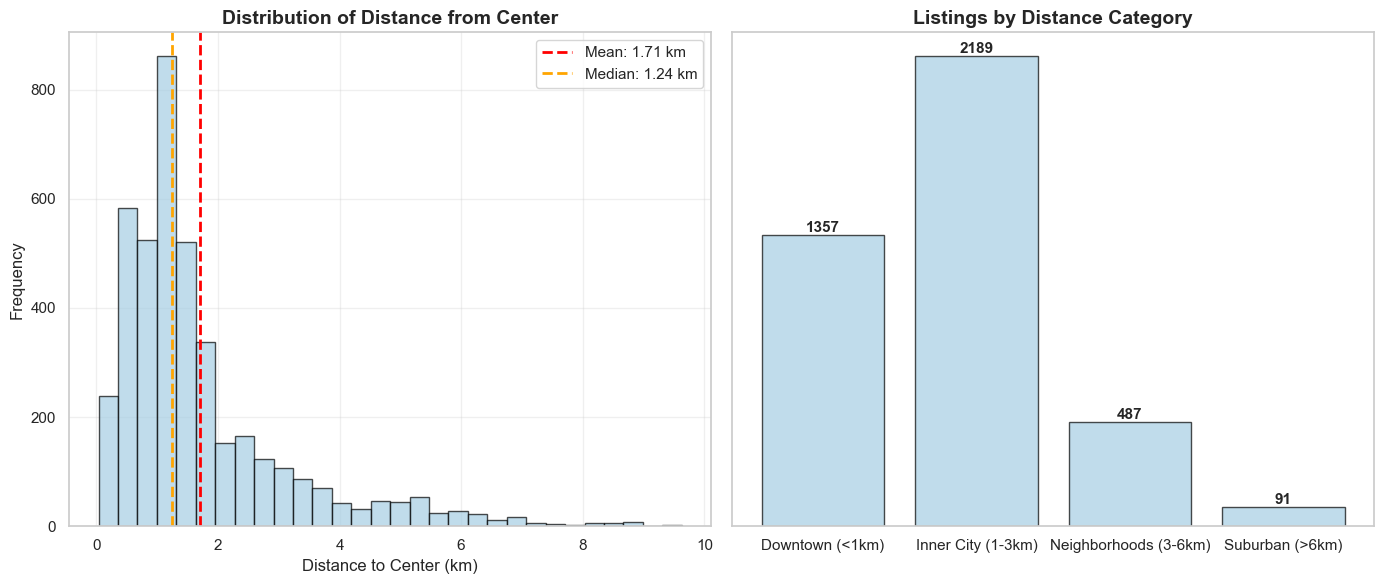

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Histogram with mean and median lines
axes[0].hist(df['distance_to_center_km'], bins=30, edgecolor='black', alpha=0.7)
mean_dist = df['distance_to_center_km'].mean()
median_dist = df['distance_to_center_km'].median()
axes[0].axvline(mean_dist, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_dist:.2f} km')
axes[0].axvline(median_dist, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_dist:.2f} km')
axes[0].set_xlabel('Distance to Center (km)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Distance from Center', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Bar chart for distance_cat
distance_cat_counts = df['distance_cat'].value_counts().sort_index()
bars = axes[1].bar(range(len(distance_cat_counts)), distance_cat_counts.values, edgecolor='black', alpha=0.7)

# Add count labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[1].set_xticks(range(len(distance_cat_counts)))
axes[1].set_xticklabels(distance_cat_counts.index, rotation=0)
axes[1].set_ylabel('')
axes[1].set_title('Listings by Distance Category', fontsize=14, fontweight='bold')
axes[1].tick_params(left=False, labelleft=False)
axes[1].grid(False)
plt.tight_layout()
plt.show()

In [32]:
print("Distance From Center Summary:")
print(df.distance_to_center_km.describe())

Distance From Center Summary:
count   4,124.00
mean        1.71
std         1.44
min         0.04
25%         0.87
50%         1.24
75%         2.01
max         9.63
Name: distance_to_center_km, dtype: float64


In [33]:
# Distance category distribution
distance_counts = df["distance_cat"].value_counts()
distance_proportions = df["distance_cat"].value_counts(normalize=True).reindex(ZONE_ORDER)

print("="*60)
print("DISTANCE CATEGORY DISTRIBUTION")
print("="*60)
print(f"\nTotal listings: {len(df):,}")
print("\nDistribution by zone:")
for zone in ZONE_ORDER:
    count = distance_counts[zone]
    proportion = distance_proportions[zone]
    print(f"  {zone:30s}: {proportion*100:5.1f}% ({count:,} listings)")

DISTANCE CATEGORY DISTRIBUTION

Total listings: 4,124

Distribution by zone:
  Downtown (<1km)               :  32.9% (1,357 listings)
  Inner City (1-3km)            :  53.1% (2,189 listings)
  Neighborhoods (3-6km)         :  11.8% (487 listings)
  Suburban (>6km)               :   2.2% (91 listings)


#### **Main Findings**

* Thessaloniki's STR market is heavily concentrated near the city center.
* 86% of listings fall within 3km of the landmark (Downtown + Inner City).
* Median distance is 1.24 km — half of all listings are within walking distance of the tourist core.
* Suburban presence is minimal: Only 2.2% of listings (91 properties) operate beyond 6km.

#### **Comment:** 

With such strong geographic concentration, any performance differences between zones carry significant market-wide relevance. The sparse suburban sample (n=91) limits statistical power for that category — findings should be interpreted with caution.

<hr>

## Who Operates Where?

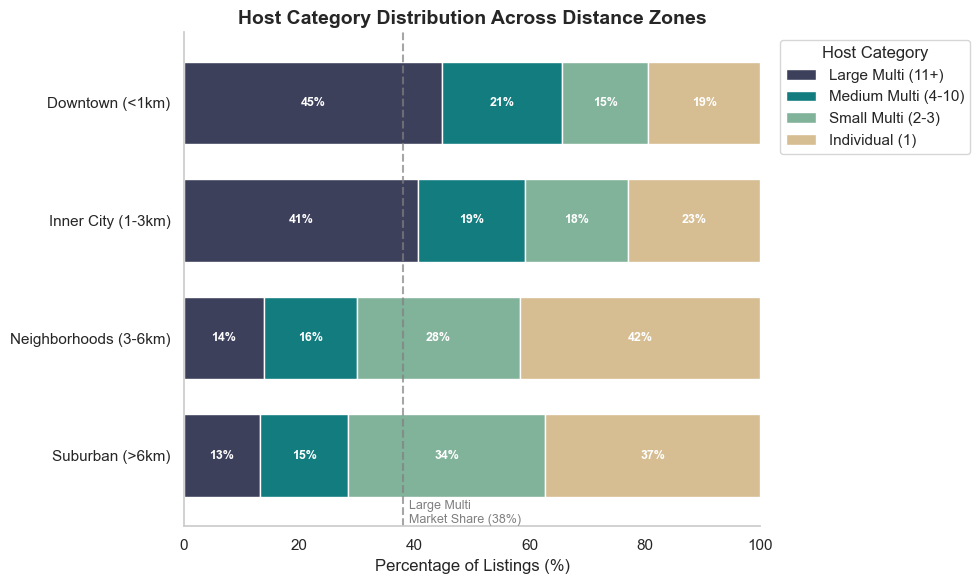

In [34]:
# 100% Stacked Bar Chart: Host Category Distribution by Distance Zone
fig, ax = plt.subplots(figsize=(10, 6))

# Create crosstab with percentages
ct = pd.crosstab(df['distance_cat'], df['host_category'], normalize='index') * 100

# Define order for zones (center to periphery)
ct = ct.reindex(REVERSE_ZONE_ORDER)

# Define order for host categories (small to large)
host_order = REVERSE_HOST_ORDER
ct = ct[host_order]

# Extract colors in the correct order
colors = [host_colors[cat] for cat in host_order]

# Plot stacked bar with custom colors
ct.plot(kind='barh', stacked=True, ax=ax, width=0.7, color=colors)

# Add percentage labels to each segment
for i, zone in enumerate(REVERSE_ZONE_ORDER):
    cumsum = 0
    for host_cat in host_order:
        width = ct.loc[zone, host_cat]
        if width > 8:  # Only label segments > 8%
            ax.text(cumsum + width/2, i, f'{width:.0f}%', 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        cumsum += width

# Styling
ax.set_xlabel('Percentage of Listings (%)', fontsize=12)
ax.set_ylabel('')
ax.set_title('Host Category Distribution Across Distance Zones', fontsize=14, fontweight='bold')
ax.legend(title='Host Category', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xlim(0, 100)

# Add reference line at Large Multi overall share (38%)
ax.axvline(x=38, color='gray', linestyle='--', alpha=0.7)
ax.text(39, -0.37, 'Large Multi\nMarket Share (38%)', fontsize=9, color='gray', va='top')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()

In [35]:
# Chi-square test: host_category vs distance_cat
contingency_table = pd.crosstab(df['distance_cat'], df['host_category'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér's V effect size
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Print results
print("=" * 60)
print("Chi-Square Test: Host Category vs Distance Category")
print("=" * 60)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v:.3f}")
    
# Effect size interpretation
if cramers_v < 0.1:
    effect = "negligible"
elif cramers_v < 0.3:
    effect = "small"
elif cramers_v < 0.5:
    effect = "moderate"
else:
    effect = "large"
print(f"Effect size: {effect}")


Chi-Square Test: Host Category vs Distance Category
Chi-square statistic: 242.38
p-value: 0.0000
Degrees of freedom: 9
Cramér's V: 0.140
Effect size: small


#### **Main Findings**

* Large Multi-property operators capture 45% of downtown listings but only 13% of suburban properties — a 3.4x difference. 
* More than half of prime tourist locations are run by professional hosts with multiple listings, indicating a strategic focus on high-demand areas.
* Smaller hosts (Single and Small multihosts) dominate away-from-center and suburban zones, likely reflecting second home sharing or investment barriers outside the core.

## Downtown's Quality Paradox

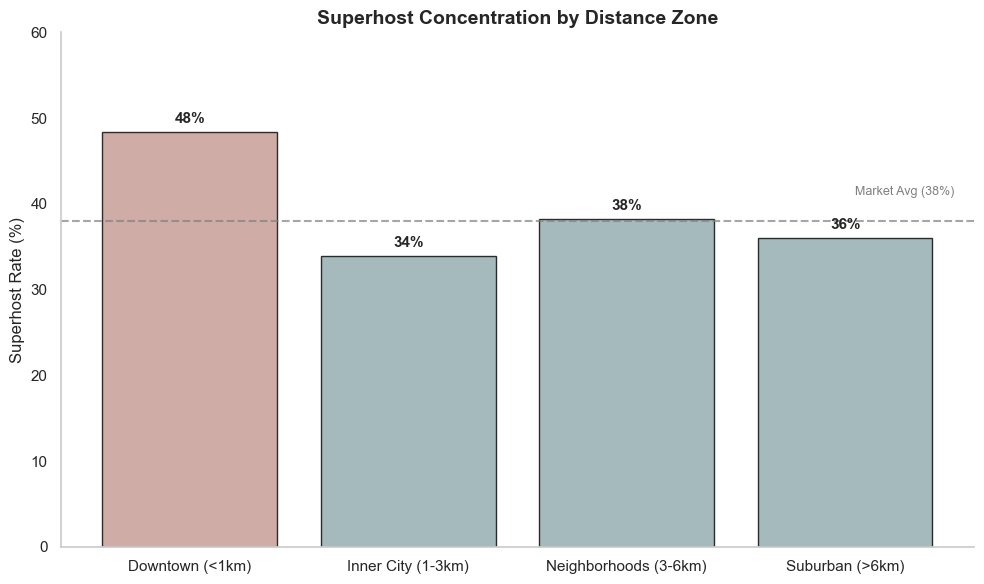

In [36]:
# Superhost Rate by Distance Zone
fig, ax = plt.subplots(figsize=(10, 6))

superhost_rates = df.groupby('distance_cat', observed=True)['host_is_superhost'].mean().reindex(ZONE_ORDER) * 100

colors = ["#C39990" if rate > 40 else "#8FA9AB" for rate in superhost_rates]
bars = ax.bar(ZONE_ORDER, superhost_rates, color=colors, edgecolor='black', alpha=0.8)

# Add percentage labels
for bar, rate in zip(bars, superhost_rates):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{rate:.0f}%', ha='center', fontsize=11, fontweight='bold')

# Reference line at market average
ax.axhline(y=38, color='gray', linestyle='--', alpha=0.7)
ax.text(3.5, 41, 'Market Avg (38%)', fontsize=9, color='gray', ha='right')

ax.set_ylabel('Superhost Rate (%)', fontsize=12)
ax.set_title('Superhost Concentration by Distance Zone', fontsize=14, fontweight='bold')
ax.set_ylim(0, 60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
# Chi-square test: host_is_superhost vs distance_cat
contingency_table = pd.crosstab(df['distance_cat'], df['host_is_superhost'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér's V effect size
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Print results
print("=" * 60)
print("Chi-Square Test: Superhost Status vs Distance Category")
print("=" * 60)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v:.3f}")
    
# Effect size interpretation
if cramers_v < 0.1:
    effect = "negligible"
elif cramers_v < 0.3:
    effect = "small"
elif cramers_v < 0.5:
    effect = "moderate"
else:
    effect = "large"
print(f"Effect size: {effect}")

Chi-Square Test: Superhost Status vs Distance Category
Chi-square statistic: 66.58
p-value: 0.000000
Degrees of freedom: 3
Cramér's V: 0.132
Effect size: small


#### **Main Findings**

* Downtown's 48% superhost rate is 10 percentage points above market average.
* Effect size is weak but meaningful (Cramér's V = 0.13) given the binary nature of the superhost variable.
* The other zones more or less follow the same pattern of the overall superhost distribution.

#### **Comment:** 

Large multihosts hold the majority of listings Downtown (45%), but only 35% of them are superhosts, it is somehow surprising to see that 48% of Downtown listings belong to superhosts.
This small paradox begs for further investigation.

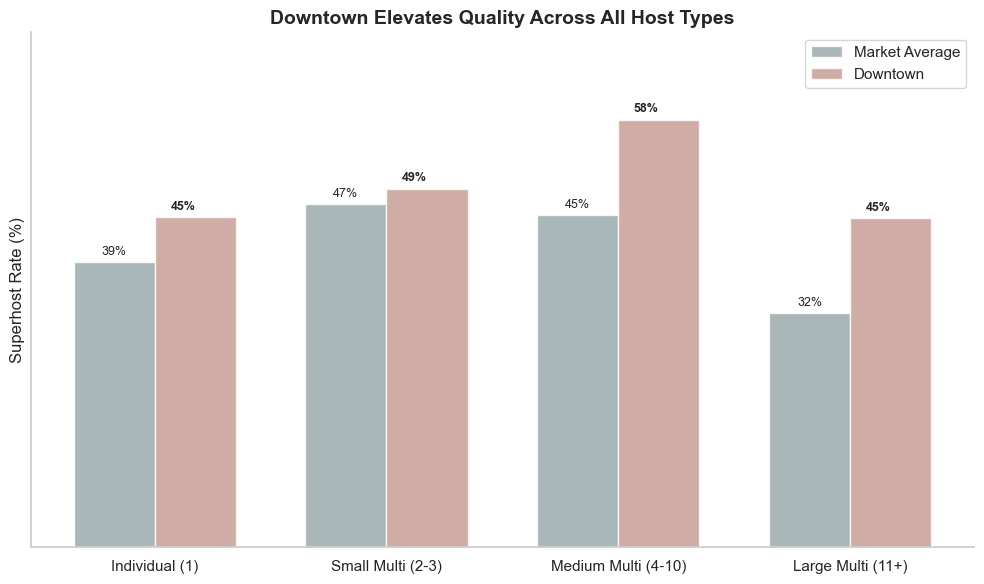

In [51]:
downtown_df = df.loc[df["distance_cat"] == 'Downtown (<1km)']

# Downtown vs Market: Superhost Rate by Host Category
fig, ax = plt.subplots(figsize=(10, 6))
# Calculate rates
downtown_rates = downtown_df.groupby('host_category')['host_is_superhost'].mean().reindex(HOST_ORDER) * 100
market_rates = df.groupby('host_category')['host_is_superhost'].mean().reindex(HOST_ORDER) * 100

x = np.arange(len(HOST_ORDER))
width = 0.35

bars1 = ax.bar(x - width/2, market_rates, width, label='Market Average', color='#95a5a6', alpha=0.8)
bars2 = ax.bar(x + width/2, downtown_rates, width, label='Downtown', color='#C39990', alpha=0.8)

# Add value labels
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{bar.get_height():.0f}%', ha='center', fontsize=9)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{bar.get_height():.0f}%', ha='right', fontsize=9, fontweight='bold')

ax.set_ylabel('Superhost Rate (%)', fontsize=12)
ax.set_title('Downtown Elevates Quality Across All Host Types', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(HOST_ORDER, rotation=0, ha='center')
ax.legend()
ax.set_ylim(0, 70)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False, labelleft=False)
plt.grid(False)
plt.tight_layout()
plt.show()

In [39]:

contingency_table = pd.crosstab(downtown_df['host_category'], downtown_df['host_is_superhost'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér's V effect size
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Print results
print("=" * 70)
print("Chi-Square Test: Superhost Status vs Host Category for Downtown Zone")
print("=" * 70)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v:.3f}")
    
# Effect size interpretation
if cramers_v < 0.1:
    effect = "negligible"
elif cramers_v < 0.3:
    effect = "small"
elif cramers_v < 0.5:
    effect = "moderate"
else:
    effect = "large"
print(f"Effect size: {effect}")

Chi-Square Test: Superhost Status vs Host Category for Downtown Zone
Chi-square statistic: 13.90
p-value: 0.003051
Degrees of freedom: 3
Cramér's V: 0.108
Effect size: small


#### **Main Findings**

* Medium multi hosts score 58% superhost rate downtown. A 14% uplift from their overall percentage.
* Great uplift for Large multi hosts also, from 32% overall to 45% downtown (+13%).
* Indivduals and Small multi hosts don't diverge much from their original percentage.

#### **Main Findings**

* Medium multihosts score 58% superhost rate downtown — a 14% uplift from their overall percentage.
* Large multihosts also show significant uplift, from 32% overall to 45% downtown (+13%).
* Individuals and Small multihosts don't diverge much from their market-wide percentage.

#### **Comment:** 

There is a clear pattern here: every category performs better downtown than their market average. This means that Downtown's competitive intensity elevates everyone's game.
The highlight is the 58% superhost rate from medium multi operators, which means that they bring their A-game to the prime location.
Equally significant is the 13% uplift for large multi hosts, which suggests that they can achieve quality when competition demands it.
On the other hand, smaller hosts seem to operate close to their ceiling, an indication that downtown smaller hosts don't differ much from those elsewhere.

<hr>

## Location Economics

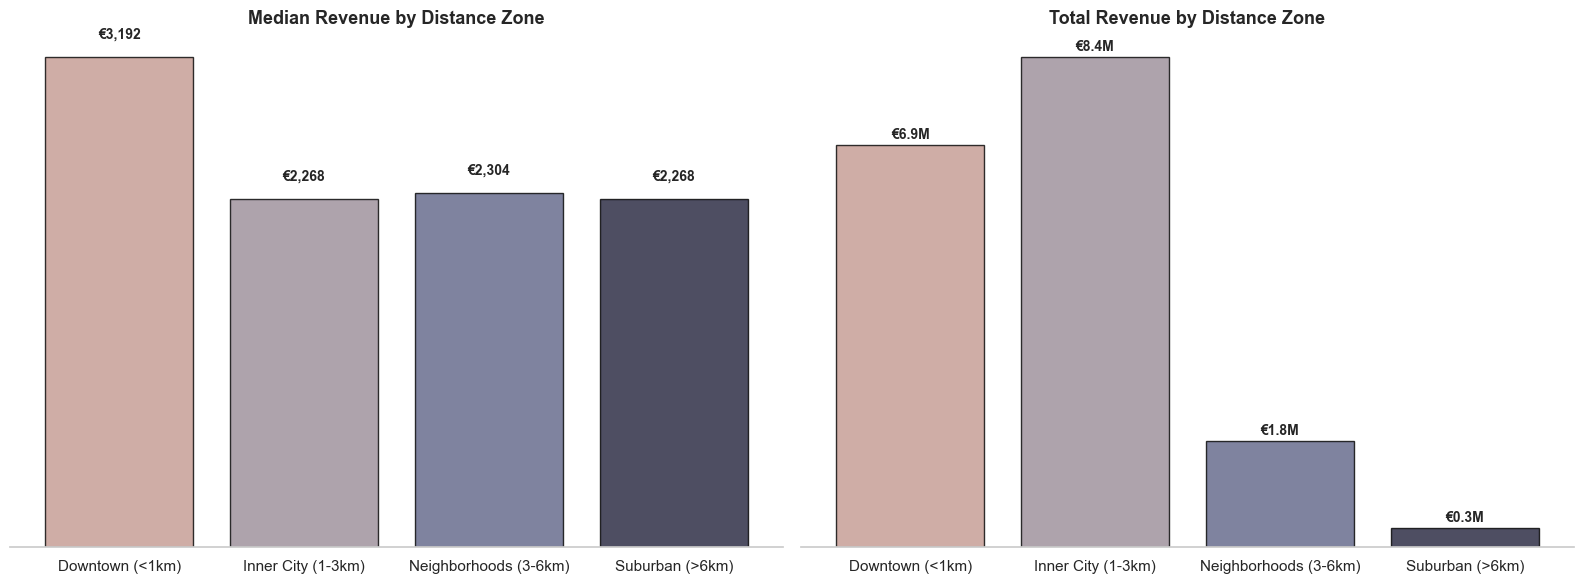

In [40]:
# Revenue comparison by zone: Median vs Total
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Median revenue
medians = df.groupby('distance_cat', observed=False)['estimated_revenue_l365d'].median().reindex(ZONE_ORDER)
colors_list = [zone_colors[zone] for zone in ZONE_ORDER]

bars1 = axes[0].bar(ZONE_ORDER, medians, color=colors_list, edgecolor='black', alpha=0.8)

# Add value labels
for bar, val in zip(bars1, medians):
    axes[0].text(bar.get_x() + bar.get_width()/2, val + 100, f'€{val:,.0f}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[0].set_title('Median Revenue by Distance Zone', fontsize=13, fontweight='bold')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].tick_params(left=False, labelleft=False)
axes[0].set_xticks(range(len(ZONE_ORDER)))
axes[0].set_xticklabels(ZONE_ORDER, rotation=0)
axes[0].grid(False)

# Right plot: Total revenue (sum)
totals = df.groupby('distance_cat', observed=False)['estimated_revenue_l365d'].sum().reindex(ZONE_ORDER)

bars2 = axes[1].bar(ZONE_ORDER, totals, color=colors_list, edgecolor='black', alpha=0.8)

# Add value labels with millions notation
for bar, val in zip(bars2, totals):
    axes[1].text(bar.get_x() + bar.get_width()/2, val + 50000, f'€{val/1e6:.1f}M', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[1].set_title('Total Revenue by Distance Zone', fontsize=13, fontweight='bold')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].tick_params(left=False, labelleft=False)
axes[1].set_xticks(range(len(ZONE_ORDER)))
axes[1].set_xticklabels(ZONE_ORDER, rotation=0)
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [41]:
# Kruskal-Wallis Test: estimated_revenue_l365d by distance_cat

groups = [df[df['distance_cat'] == zone]['estimated_revenue_l365d'].dropna() for zone in ZONE_ORDER]

# Run Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(*groups)

# Calculate epsilon-squared effect size
n = sum(len(g) for g in groups)
k = len(groups)
epsilon_sq = (h_stat - k + 1) / (n - k)

# Effect size interpretation
if epsilon_sq < 0.01:
    effect = "negligible"
elif epsilon_sq < 0.06:
    effect = "small"
elif epsilon_sq < 0.14:
    effect = "moderate"
else:
    effect = "large"


print("=" * 60)
print("Estimated Revenue by Distance Category (Non-parametric Test)")
print("=" * 60)
print(f"\nKruskal-Wallis H = {h_stat:.3f}, p = {p_value:.6f}")
print(f"Epsilon-squared (ε²) = {epsilon_sq:.4f} ({effect} effect)")


Estimated Revenue by Distance Category (Non-parametric Test)

Kruskal-Wallis H = 41.462, p = 0.000000
Epsilon-squared (ε²) = 0.0099 (negligible effect)


#### **Main Findings**

* Downtown properties yield higher revenue than the rest distance categories, but location alone explains only 1% of this variation, hinting the existence of more confounding variables.
* Inner city listings drive the overall market revenue due to their volume, despite lower per-listing performance.

<hr>

## Price Positioning by Zone

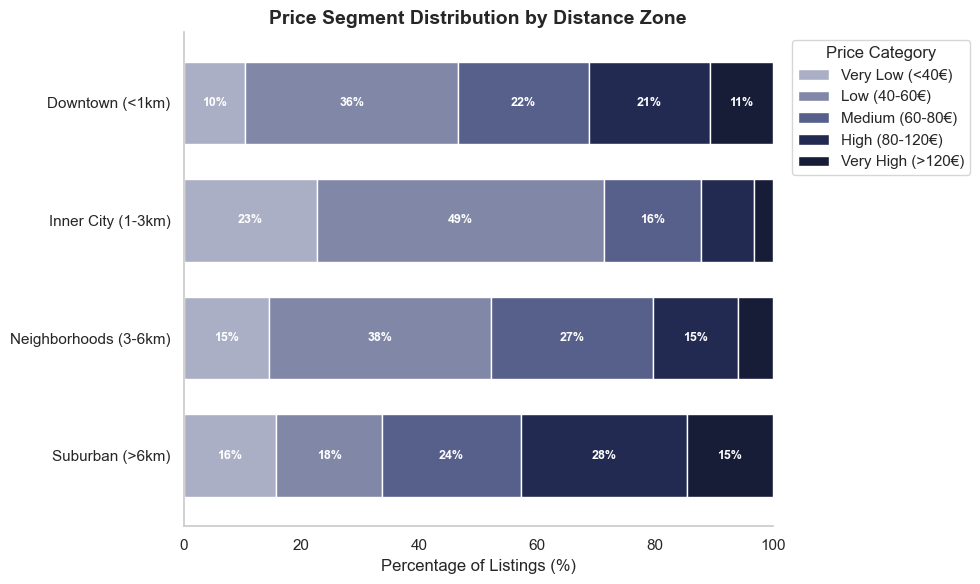

In [42]:
# Price Category Distribution by Distance Zone
fig, ax = plt.subplots(figsize=(10, 6))

# Create crosstab with percentages
ct = pd.crosstab(df['distance_cat'], df['price_cat'], normalize='index') * 100

ct = ct.reindex(REVERSE_ZONE_ORDER)


ct = ct[PRICE_ORDER]

# Plot
ct.plot(kind='barh', stacked=True, ax=ax, width=0.7, 
        color=[price_colors[cat] for cat in PRICE_ORDER])

# Add percentage labels for segments > 10%
for i, zone in enumerate(REVERSE_ZONE_ORDER):
    cumsum = 0
    for price_cat in PRICE_ORDER:
        width = ct.loc[zone, price_cat]
        if width > 10:
            ax.text(cumsum + width/2, i, f'{width:.0f}%', 
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')
        cumsum += width

ax.set_xlabel('Percentage of Listings (%)', fontsize=12)
ax.set_ylabel('')
ax.set_title('Price Segment Distribution by Distance Zone', fontsize=14, fontweight='bold')
ax.legend(title='Price Category', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xlim(0, 100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.tight_layout()
plt.show()

In [43]:
# Chi-square test: price_cat vs distance_cat
contingency_table = pd.crosstab(df['distance_cat'], df['price_cat'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér's V effect size
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("=" * 60)
print("Chi-Square Test: Price Category vs Distance Category")
print("=" * 60)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v:.3f}")

# Effect size interpretation
if cramers_v < 0.1:
    effect = "negligible"
elif cramers_v < 0.2:
    effect = "small"
elif cramers_v < 0.4:
    effect = "moderate"
else:
    effect = "large"
print(f"Effect size: {effect}")

print("="*60)
print("Premium Share (High + Very High) by Zone:")
premium = pd.crosstab(df['distance_cat'], df['price_cat'], normalize='index') * 100
for zone in REVERSE_ZONE_ORDER:
    high = premium.loc[zone, 'High (80-120€)']
    v_high = premium.loc[zone, 'Very High (>120€)']
    print(f"  {zone}: {high + v_high:.0f}%")

Chi-Square Test: Price Category vs Distance Category
Chi-square statistic: 316.49
p-value: 0.0000000000
Degrees of freedom: 12
Cramér's V: 0.164
Effect size: small
Premium Share (High + Very High) by Zone:
  Suburban (>6km): 43%
  Neighborhoods (3-6km): 20%
  Inner City (1-3km): 12%
  Downtown (<1km): 31%


#### **Main Findings**

* **Downtown commands premium positioning**: 32% of downtown listings price at €80+ (High + Very High), compared to just 12% in Inner City.
* **Inner City is the budget zone**: 72% of listings are under €60, probably serving price-sensitive travelers or extended stays.
* 43% of suburban listings target premium segments—likely larger properties or unique offerings that justify distance from center.
* Cramér's V = 0.164 indicates a weak but meaningful association.

<hr>

## Guest Location Satisfaction

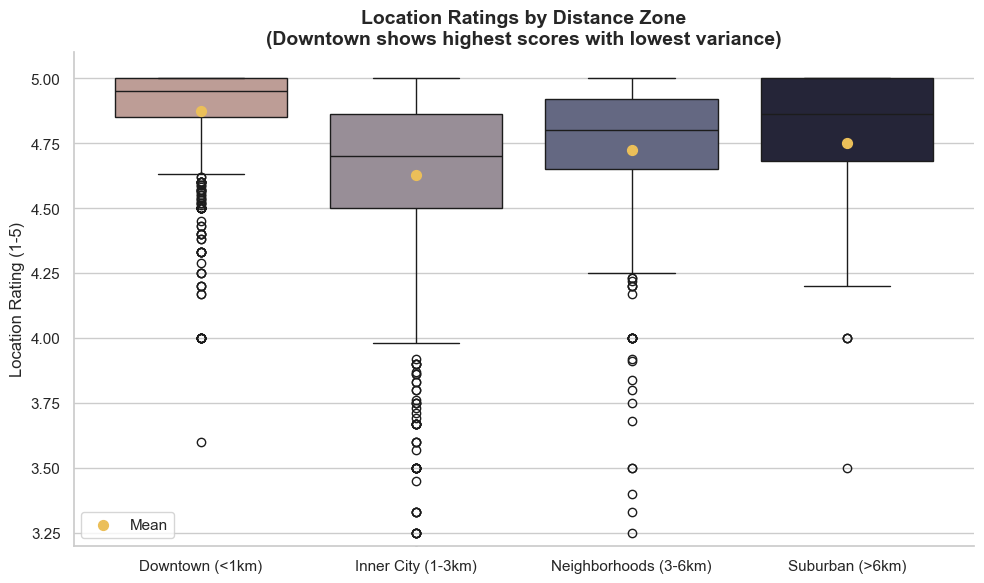

In [44]:
# Location Rating Distribution by Distance Zone
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df, x='distance_cat', y='review_scores_location', 
            order=ZONE_ORDER, hue='distance_cat', legend=False, palette=zone_colors, ax=ax)

# Add mean markers
means = df.groupby('distance_cat', observed=False)['review_scores_location'].mean().reindex(ZONE_ORDER)
ax.scatter(range(len(ZONE_ORDER)), means, color='#ebbf59', s=50, zorder=5, label='Mean')
ax.set_xlabel('')
ax.set_ylabel('Location Rating (1-5)', fontsize=12)
ax.set_title('Location Ratings by Distance Zone\n(Downtown shows highest scores with lowest variance)', 
             fontsize=14, fontweight='bold')
ax.set_ylim(3.2, 5.1)
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [45]:
# Kruskal-Wallis Test: review_scores_location by distance_cat
groups = [df[df['distance_cat'] == zone]['review_scores_location'].dropna() for zone in ZONE_ORDER]

# Run Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(*groups)

# Calculate epsilon-squared effect size
n = sum(len(g) for g in groups)
k = len(groups)
epsilon_sq = (h_stat - k + 1) / (n - k)

# Effect size interpretation
if epsilon_sq < 0.01:
    effect = "negligible"
elif epsilon_sq < 0.06:
    effect = "small"
elif epsilon_sq < 0.14:
    effect = "moderate"
else:
    effect = "large"

print("=" * 60)
print("Location Ratings by Distance Category (Non-parametric Test)")
print("=" * 60)
print(f"\nKruskal-Wallis H = {h_stat:.3f}, p = {p_value:.6f}")
print(f"Epsilon-squared (ε²) = {epsilon_sq:.4f} ({effect} effect)")

Location Ratings by Distance Category (Non-parametric Test)

Kruskal-Wallis H = 783.888, p = 0.000000
Epsilon-squared (ε²) = 0.1895 (large effect)


#### **Main Findings**

* Downtown's location ratings have the highest mean and the lowest variance, a clear sign that guests appreciate being next to the city center. This consistency likely contributes to significantly higher superhost rates.
* Despite being central, Inner City listings get the lowest location ratings combined with big variance.

#### **Comment:** 

Inner city listings show both low ratings and great variance. This is partly explained by the fact that it is the larger group of the three and combines diverse neighborhoods with varying levels of appeal. But it can also signal a condition where central places of interest are not so easily accessible despite being close, thus undermining the overall visitors' experience. Further qualitative research could help unpack guest perceptions in these zone.

<hr>

## Neighbourhood Overview

The dataset includes listings from 7 administrative municipalities. **Thessaloniki** (the central municipality) dominates with the vast majority of listings, while peripheral municipalities have limited representation. Due to small sample sizes (n < 150 each for peripheral areas), the following summary is **descriptive only** as formal statistical comparisons would lack robustness.

In [46]:
# Neighbourhood Summary Table
neighbourhood_summary = df.groupby('neighbourhood_cleansed', observed=True).agg({
    'id': 'count',
    'price': 'median',
    'estimated_revenue_l365d': 'median',
    'estimated_occupancy_l365d': 'median',
    'listing_age_years': 'median',
    'review_scores_location': 'mean',
    'review_scores_value': 'mean',
    'distance_to_center_km': 'mean',
    'host_is_superhost': lambda x: (x.mean() * 100).round(0)
}).round(2)

neighbourhood_summary.columns = ['Listings', 'Median Price (€)', 'Median Revenue (€)', 
                                  'Median Occupancy (days)', 'Median Listing Age (years)', 'Avg Location Rating', 'Avg Value Rating', 'Mean Dist (km)', 'Superhost %']
# Add dominant host category
dominant_host = df.groupby('neighbourhood_cleansed', observed=True)['host_category'].agg(
    lambda x: x.value_counts().index[0]
)
neighbourhood_summary['Dominant Host Type'] = dominant_host

# Sort by listing count
neighbourhood_summary = neighbourhood_summary.sort_values('Listings', ascending=False)

# Display
print("Neighbourhood Performance Summary")
print("=" * 80)
print("Peripheral municipalities have n < 150 — interpret directionally only\n")
print(neighbourhood_summary[["Listings", "Dominant Host Type"]])

Neighbourhood Performance Summary
Peripheral municipalities have n < 150 — interpret directionally only

                        Listings Dominant Host Type
neighbourhood_cleansed                             
Thessaloniki                3634  Large Multi (11+)
Kalamaria                    147     Individual (1)
Neapolis – Sykeon            109     Individual (1)
Pilea – Chortiatis            73     Individual (1)
Ampelokipon – Menemeni        64  Small Multi (2-3)
Pavlou Mela                   55     Individual (1)
Kordelio – Evosmos            42     Individual (1)


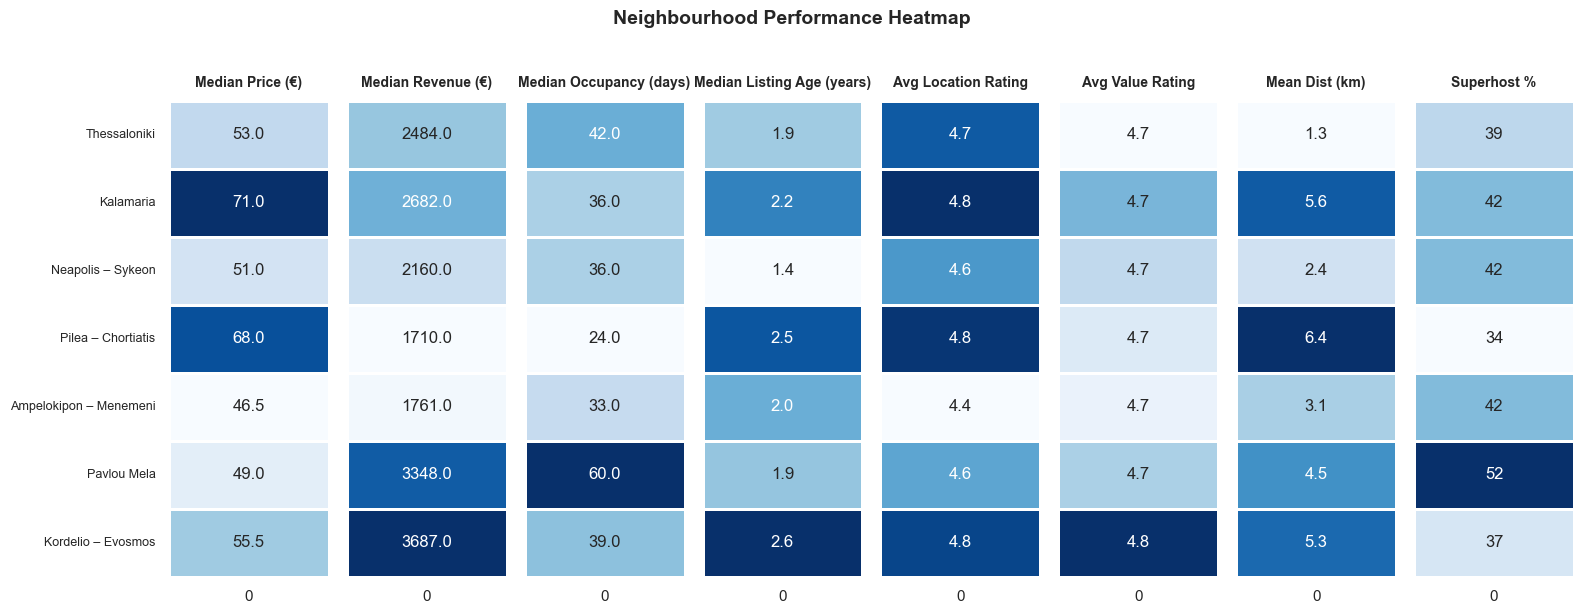

In [47]:
# Prepare data for heatmap
heatmap_data = neighbourhood_summary.drop(columns=['Listings', 'Dominant Host Type'])

# Create figure with subplots - one for each column
fig, axes = plt.subplots(1, len(heatmap_data.columns), figsize=(16, 6))

for i, col in enumerate(heatmap_data.columns):
    ax = axes[i]
    
    # Reshape data for heatmap (vertical bars)
    data = heatmap_data[[col]].values
    
    # Create heatmap
    sns.heatmap(data, 
                annot=True, 
                fmt='.0f' if col == 'Superhost %' else '.1f',
                cmap='Blues',
                cbar=False,
                ax=ax,
                linewidths=1,
                linecolor='white',
                yticklabels=heatmap_data.index if i == 0 else False)
    
    # Styling
    ax.set_title(col, fontsize=10, fontweight='bold', pad=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(left=False, bottom=False)
    
    if i == 0:
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', fontsize=9)

plt.suptitle('Neighbourhood Performance Heatmap', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#### **Neighbourhood Performance Summary**

* **Pavlou Mela** seems to be a hidden performer: top superhost rate (52%) very high median revenue and by far the highest occupancy, and all of the above for the second lowest price.
* **Kordelio-Evosmos** shows the highest revenue, value ratings and listing age. A sign that well-established listings in residential areas can perform strongly.
* **Kalamaria** stands out for its high priced listings and strong location ratings, although far from the city center, signifying its appeal as a seaside residential area.
* **Neapolis-Sykeon** has the youngest listings (1.4 years) yet matches top superhost rates (42%), probably a promising growth area.

> *Note: These observations should be validated with larger samples before policy recommendations.

<hr>

### **Summary and Recommendations**

Diving into Thessaloniki's STR location dynamics, some interesting patterns are revealed: 

* Guest preferences strongly favor downtown proximity as evidenced by location ratings ($\epsilon^2 = 0.19$).
* Downtown positioning explains quality outcomes better than revenue outcomes. High demand for central locations elevates competition, driving hosts to noticeably improve their quality standards and guest experience.
* Large multi-property operators systematically target downtown and inner city listings in an effort to capitalize on tourist demand (~3× Large Multihosts concentration downtown vs. neighborhoods).
* Despite being near the city center, inner city listings show the lowest location ratings, signaling a possible expectation mismatch. These listings mostly serve as the budget zone of the market, with 72% of properties priced under €60, catering to price-sensitive guests.
* Peripheral areas show a more balanced host mix, with smaller operators dominating. 

All the above paint a picture of a market where location significantly influences both host strategy and guest experience. Downtown listings seem to form a self-reinforcing competitive ecosystem where quality is elevated across the board. But policy makers should be cautious about over commercialization of in this part of the city and ensure the viability of residential life and market balance.
Efforts should also focus on raising the standards of listings in inner city, both in terms of quality/guest experience and city center accessibility (e.g. transport links, walkability).


### **Summary and Recommendations**

Diving into Thessaloniki's STR location dynamics, some interesting patterns are revealed: 

* Guest preferences strongly favor downtown proximity as evidenced by location ratings ($\epsilon^2 = 0.19$).
* Downtown positioning explains quality outcomes better than revenue outcomes. High demand for central locations elevates competition, driving hosts to noticeably improve their quality standards and guest experience.
* Large multi-property operators systematically target downtown and inner city listings in an effort to capitalize on tourist demand (~3× Large Multihosts concentration downtown vs. neighborhoods).
* Despite being near the city center, inner city listings show the lowest location ratings, signaling a possible expectation mismatch. These listings mostly serve as the budget zone of the market, with 72% of properties priced under €60, catering to price-sensitive guests.
* Peripheral areas show a more balanced host mix, with smaller operators dominating. 

All the above paint a picture of a market where location significantly influences both host strategy and guest experience. Downtown listings seem to form a self-reinforcing competitive ecosystem where quality is elevated across the board. But policy makers should be cautious about over commercialization of in this part of the city and ensure the viability of residential life and market balance.
Efforts should also focus on raising the standards of listings in inner city, both in terms of quality/guest experience and city center accessibility (e.g. transport links, walkability).

<hr>

## Appendix: Exploratory Analysis Code

*The cells below contain exploratory analysis used during development. They are preserved for reproducibility but are not part of the main narrative.*

In [48]:
# Variables to check against distance category
variables = [
    "host_category",
    "host_is_superhost",
    "estimated_revenue_l365d",
    "estimated_occupancy_l365d",
    "review_scores_location",
    "review_scores_value",
    "price",
    "price_cat",
    "accommodates",
    "market_maturity"
]

CATEGORICAL VARIABLE ANALYSIS: host_category

Cardinality: 4 unique categories
Missing values: 0 (0.00%)
Total observations: 4124

Most Common Category: 'Large Multi (11+)' (1576 occurrences, 38.22%)

No rare categories found (<5% threshold)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                     Count  Percentage
host_category                         
Large Multi (11+)     1576       38.22
Individual (1)        1003       24.32
Medium Multi (4-10)    780       18.91
Small Multi (2-3)      765       18.55


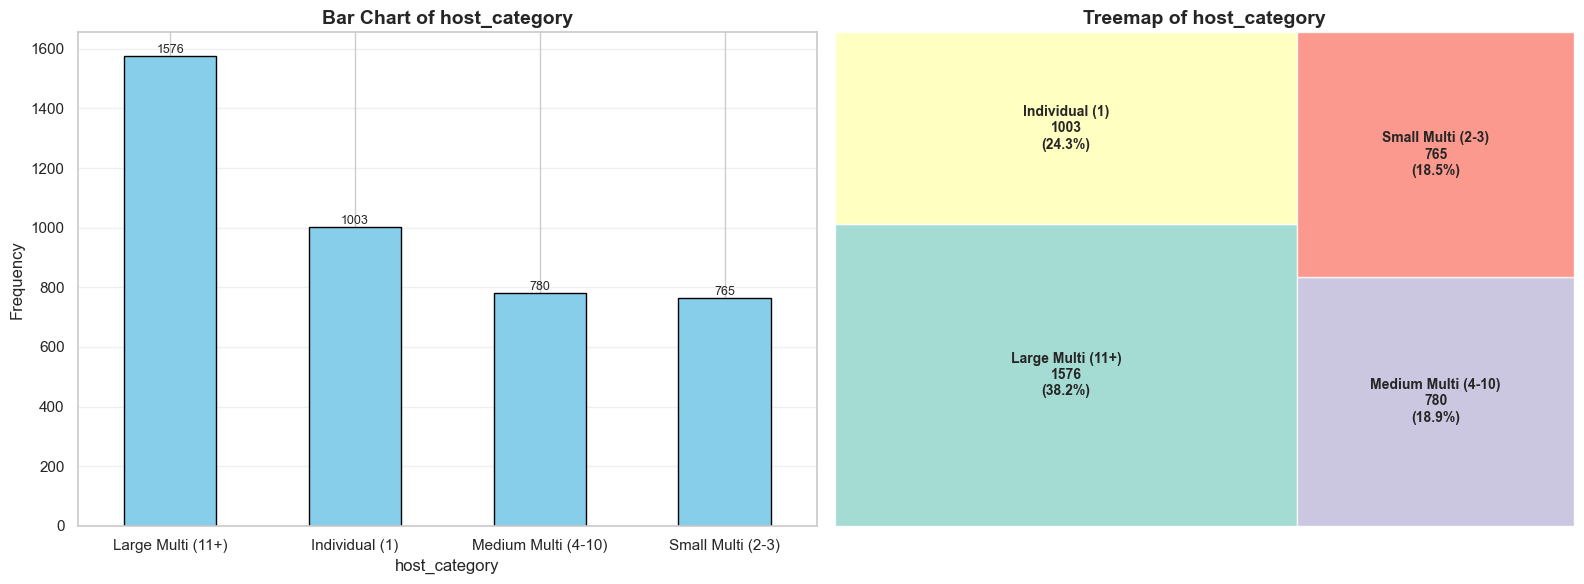

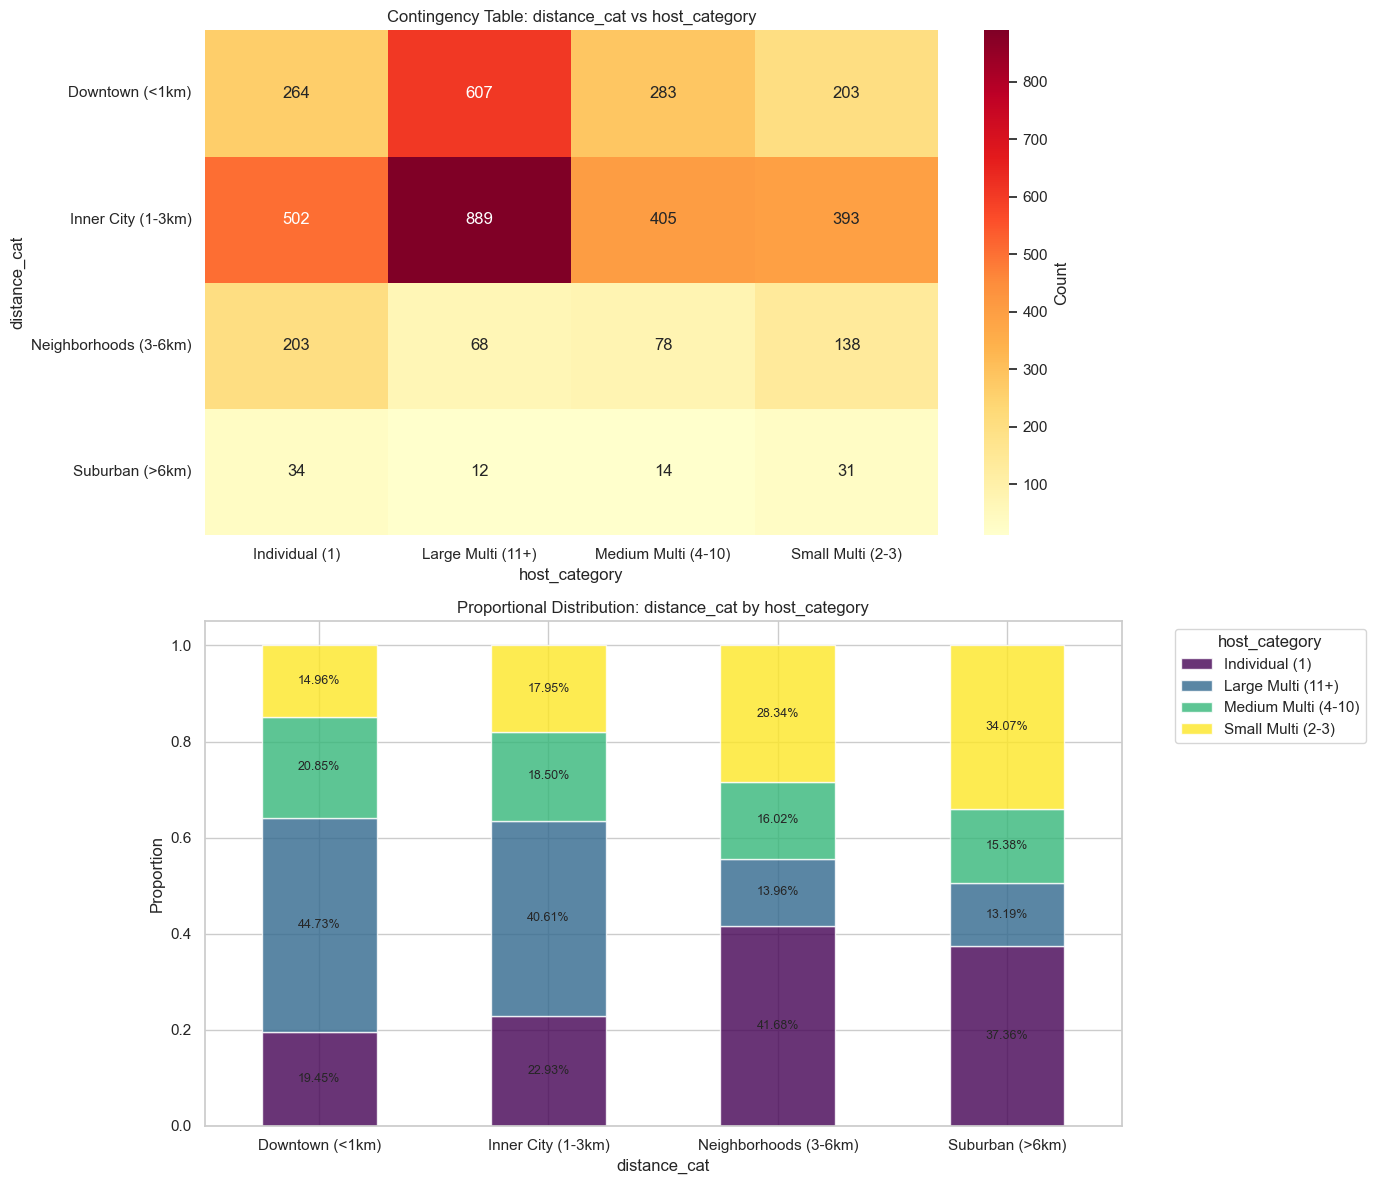

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs host_category

Contingency Table:
host_category          Individual (1)  Large Multi (11+)  Medium Multi (4-10)  \
distance_cat                                                                    
Downtown (<1km)                   264                607                  283   
Inner City (1-3km)                502                889                  405   
Neighborhoods (3-6km)             203                 68                   78   
Suburban (>6km)                    34                 12                   14   

host_category          Small Multi (2-3)  
distance_cat                              
Downtown (<1km)                      203  
Inner City (1-3km)                   393  
Neighborhoods (3-6km)                138  
Suburban (>6km)                       31  

Test Statistics:
  Chi-square statistic: 242.3805
  Degrees of freedom:   9
  P-value:              0.000000
  Cramér's V:           0.140
  Effect size:          Weak ass

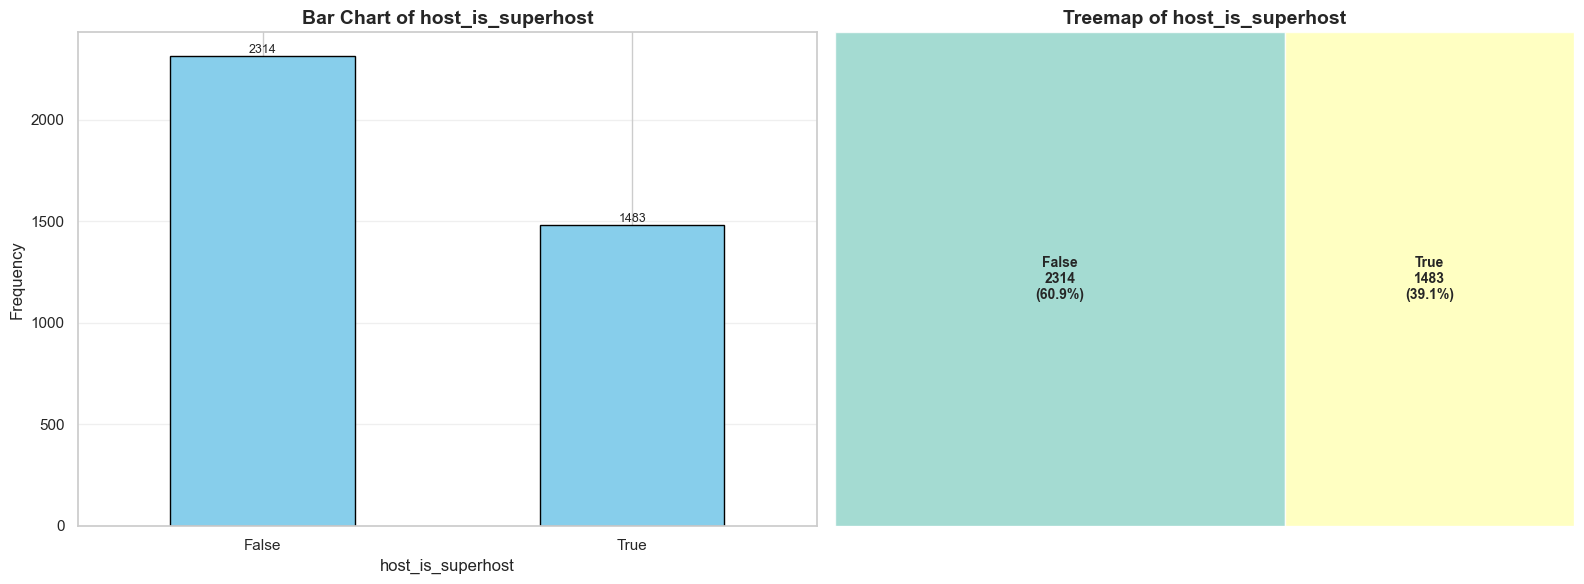

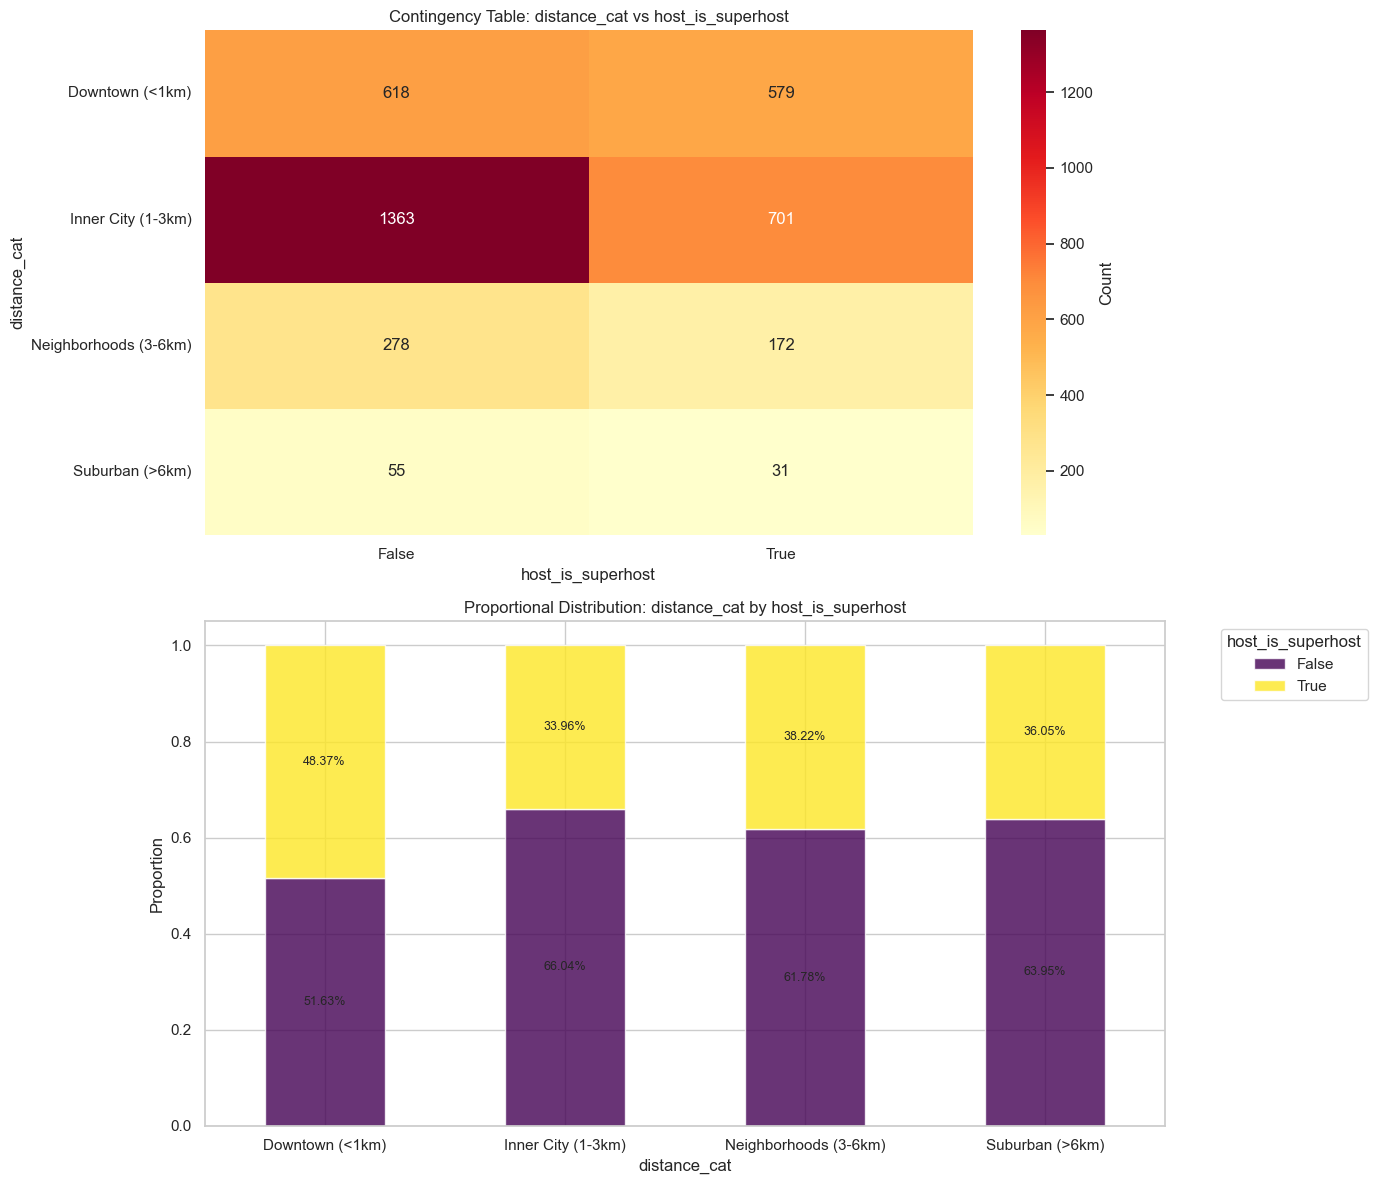

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs host_is_superhost

Contingency Table:
host_is_superhost      False  True 
distance_cat                       
Downtown (<1km)          618    579
Inner City (1-3km)      1363    701
Neighborhoods (3-6km)    278    172
Suburban (>6km)           55     31

Test Statistics:
  Chi-square statistic: 66.5839
  Degrees of freedom:   3
  P-value:              0.000000
  Cramér's V:           0.132
  Effect size:          Weak association
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT association detected (p=0.000000). distance_cat and host_is_superhost are related. Weak association (Cramér's V = 0.132).

 

DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           4442.79
  Median:         2436.00
  Mode:           0.0

Dispersion:
  Std Dev:        5861.73
  Variance:       34359858.62
  Range:          109896.00
  IQR:            5448.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       852.00
  Q2 (5

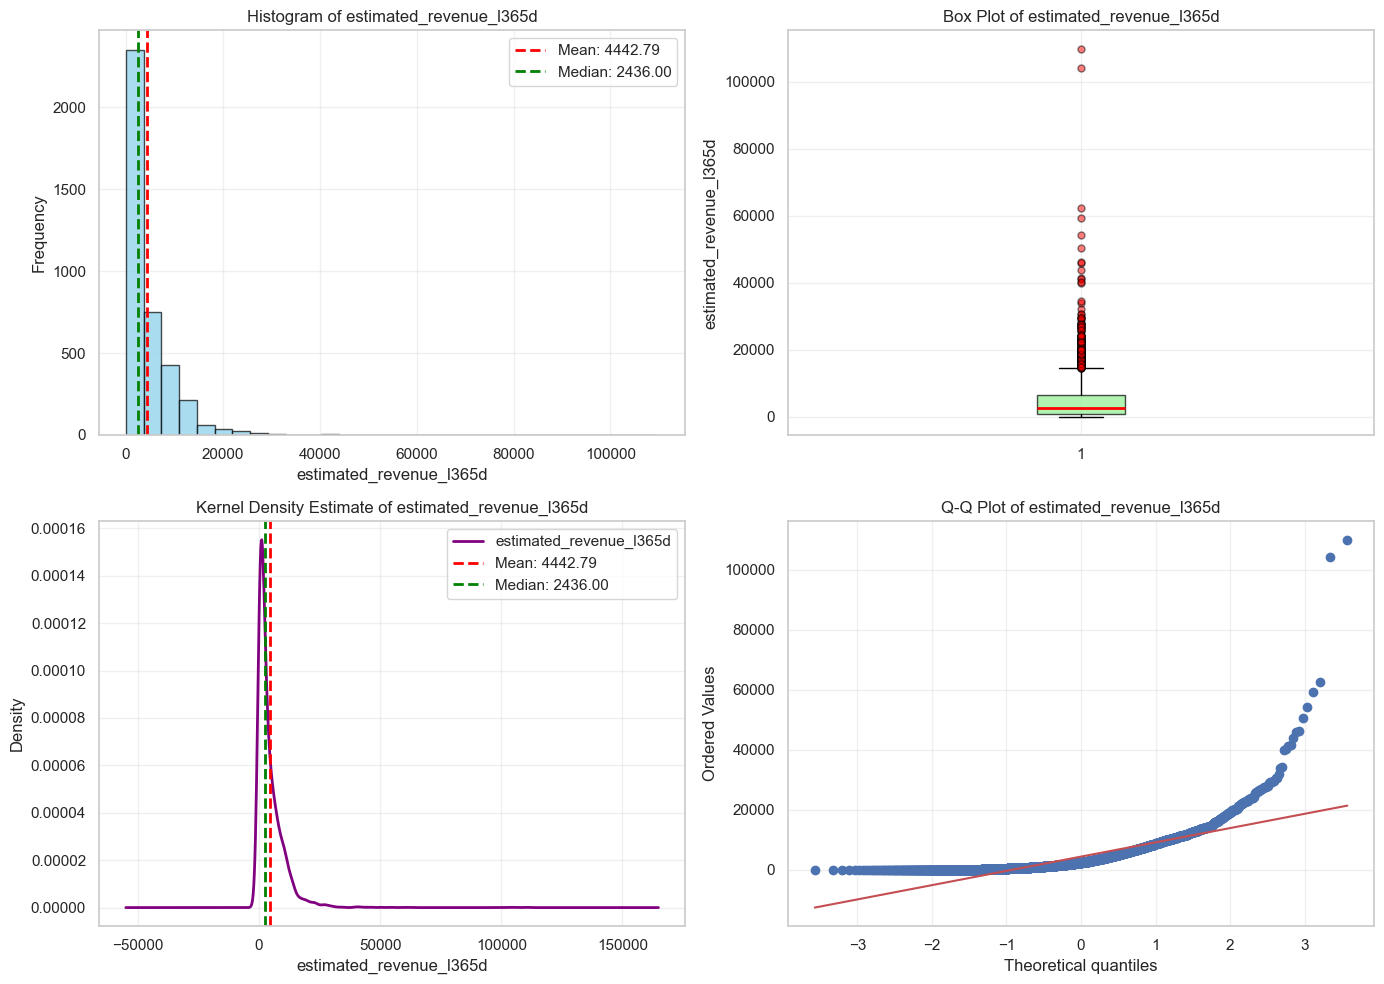

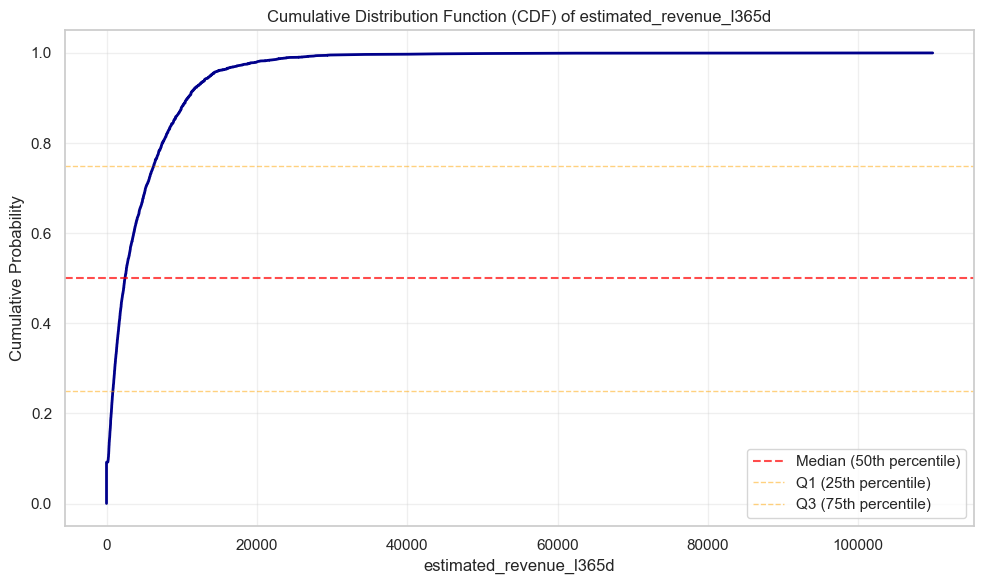

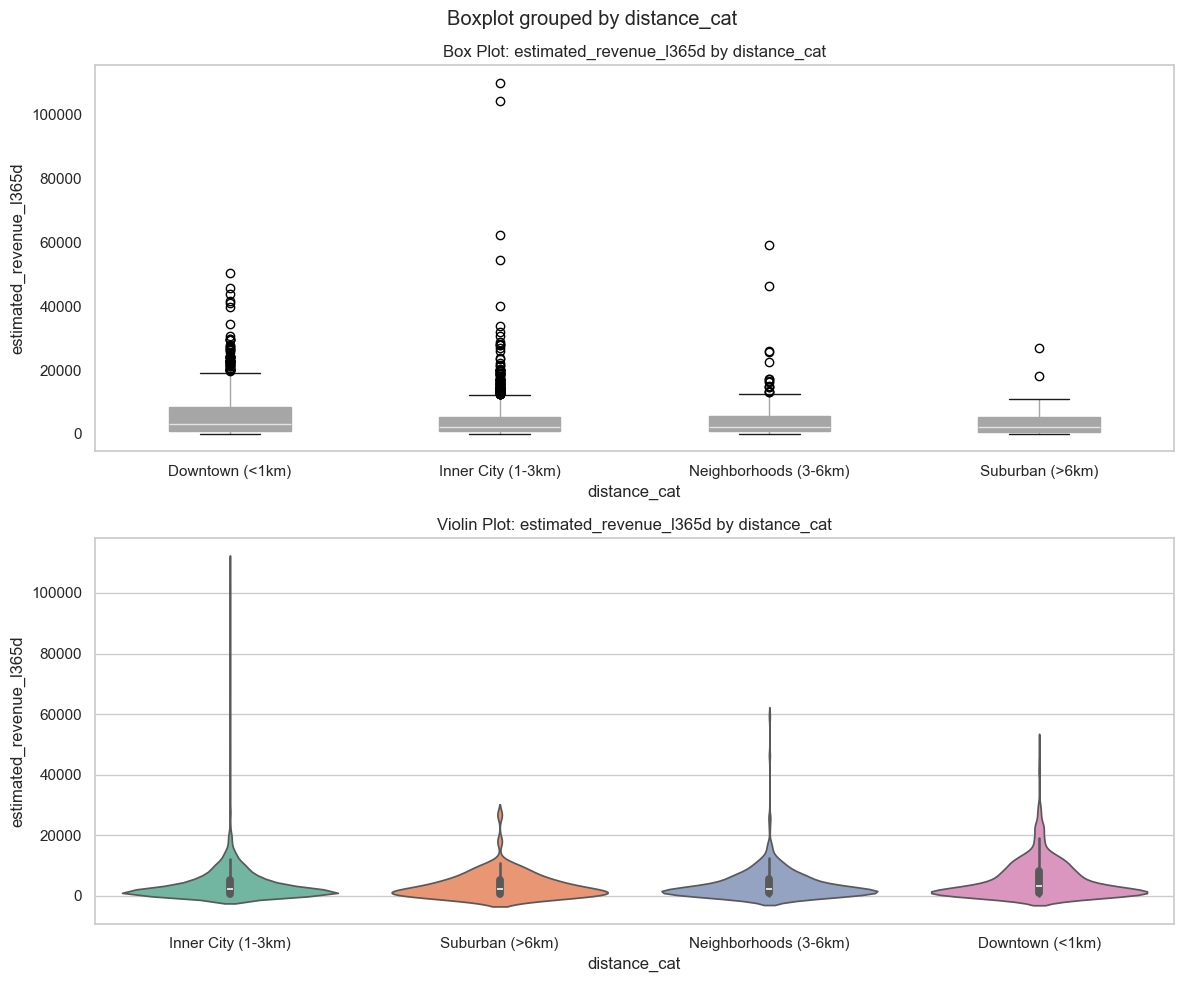

ONE-WAY ANOVA: estimated_revenue_l365d by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2108
    Mean:   3969.7666
    Median: 2268.0000
    Std:    5675.7370
    Min:    0.0000
    Max:    109896.0000

  distance_cat = Suburban (>6km):
    N:      89
    Mean:   3543.0787
    Median: 2268.0000
    Std:    4234.6428
    Min:    0.0000
    Max:    26784.0000

  distance_cat = Neighborhoods (3-6km):
    N:      462
    Mean:   3924.5303
    Median: 2304.0000
    Std:    5090.2431
    Min:    0.0000
    Max:    59280.0000

  distance_cat = Downtown (<1km):
    N:      1248
    Mean:   5497.7941
    Median: 3192.0000
    Std:    6379.7905
    Min:    0.0000
    Max:    50430.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      20.2492
  P-value:             0.000000
  Eta-squared (η²):    0.015
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (

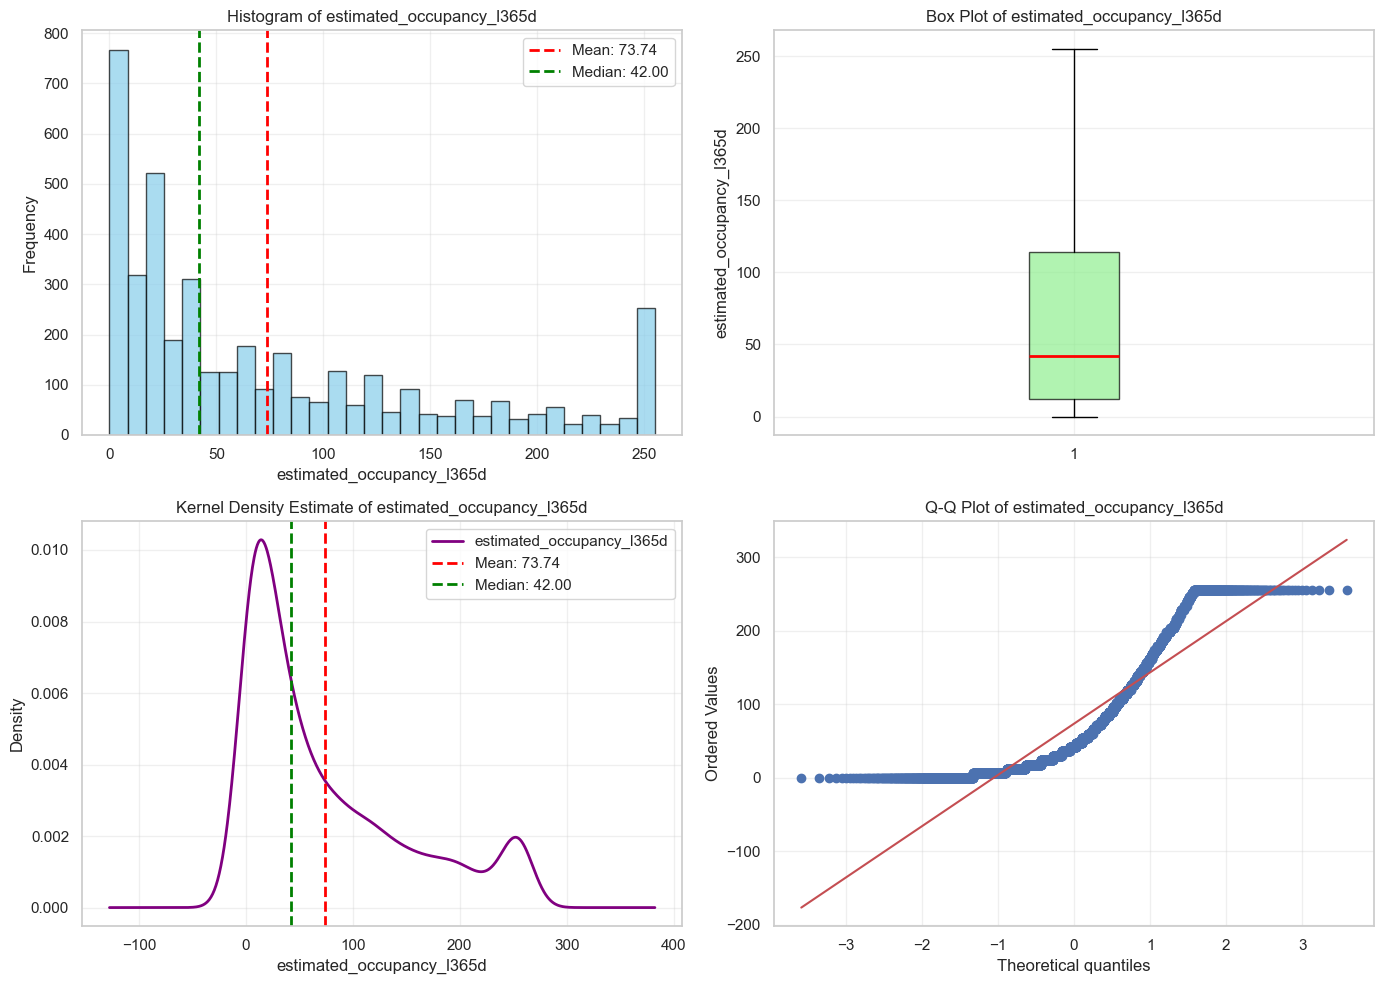

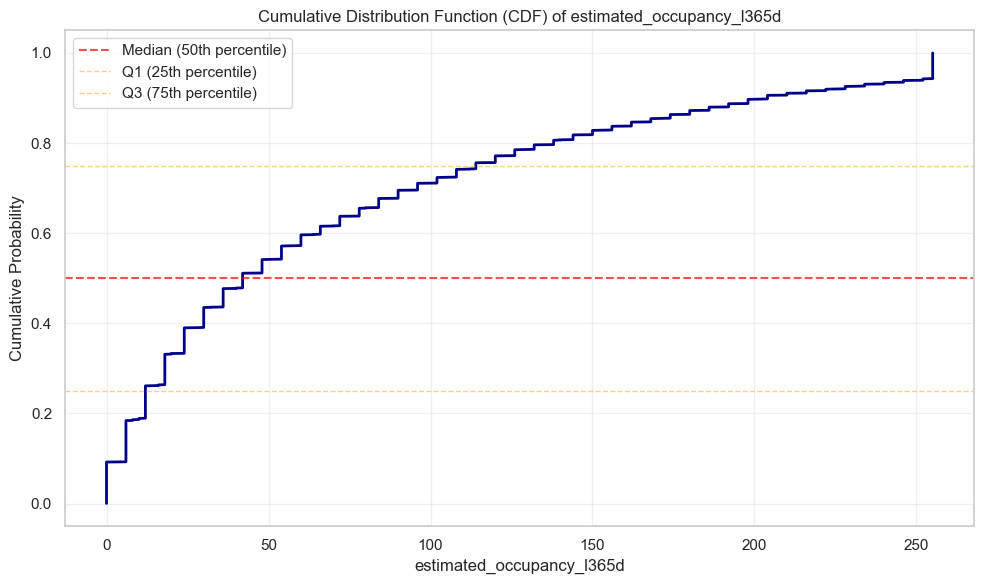

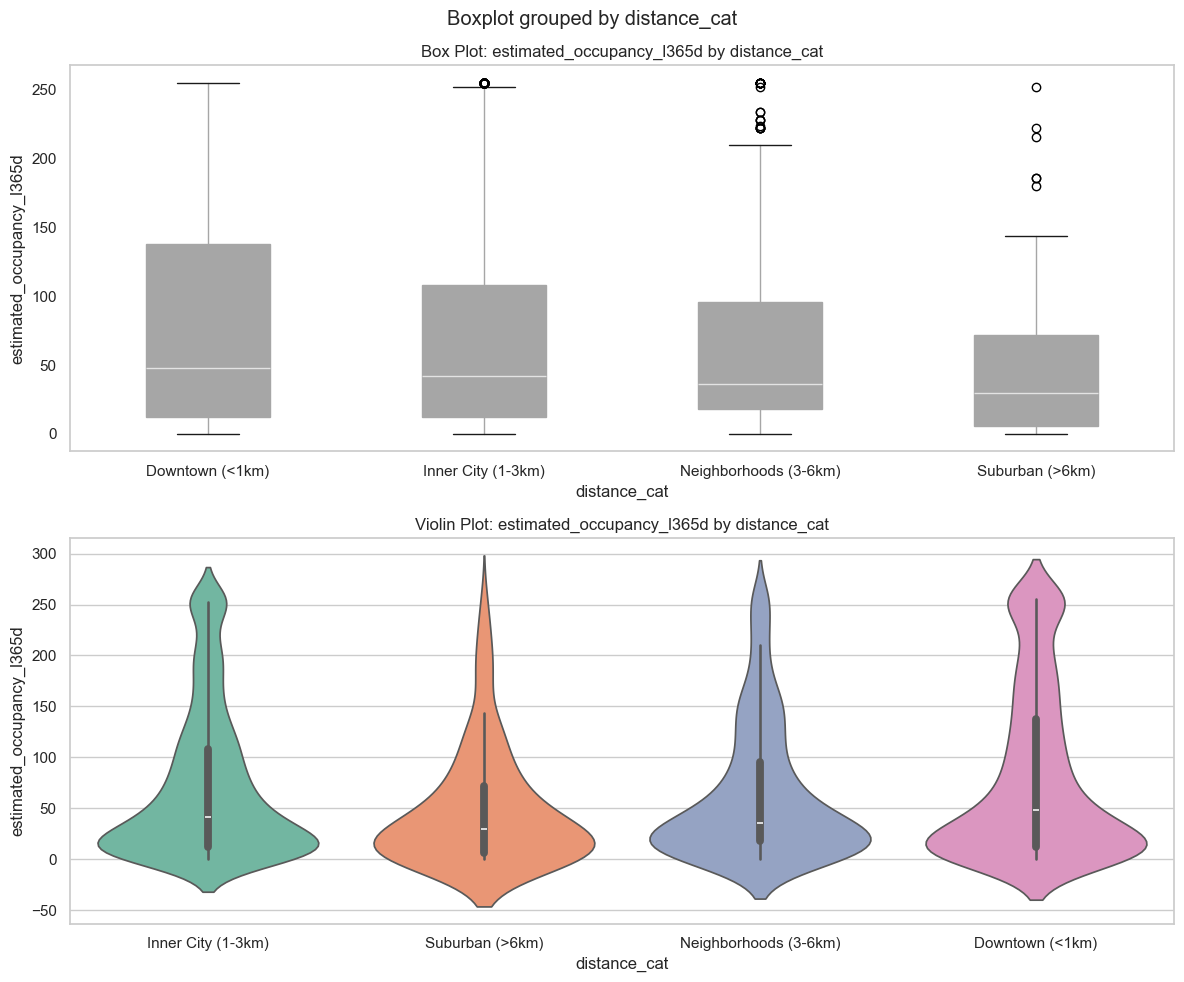

ONE-WAY ANOVA: estimated_occupancy_l365d by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2189
    Mean:   72.3865
    Median: 42.0000
    Std:    73.7859
    Min:    0.0000
    Max:    255.0000

  distance_cat = Suburban (>6km):
    N:      91
    Mean:   48.1538
    Median: 30.0000
    Std:    56.8258
    Min:    0.0000
    Max:    252.0000

  distance_cat = Neighborhoods (3-6km):
    N:      487
    Mean:   63.3532
    Median: 36.0000
    Std:    66.2157
    Min:    0.0000
    Max:    255.0000

  distance_cat = Downtown (<1km):
    N:      1357
    Mean:   81.3795
    Median: 48.0000
    Std:    83.5647
    Min:    0.0000
    Max:    255.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      11.2693
  P-value:             0.000000
  Eta-squared (η²):    0.008
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat 

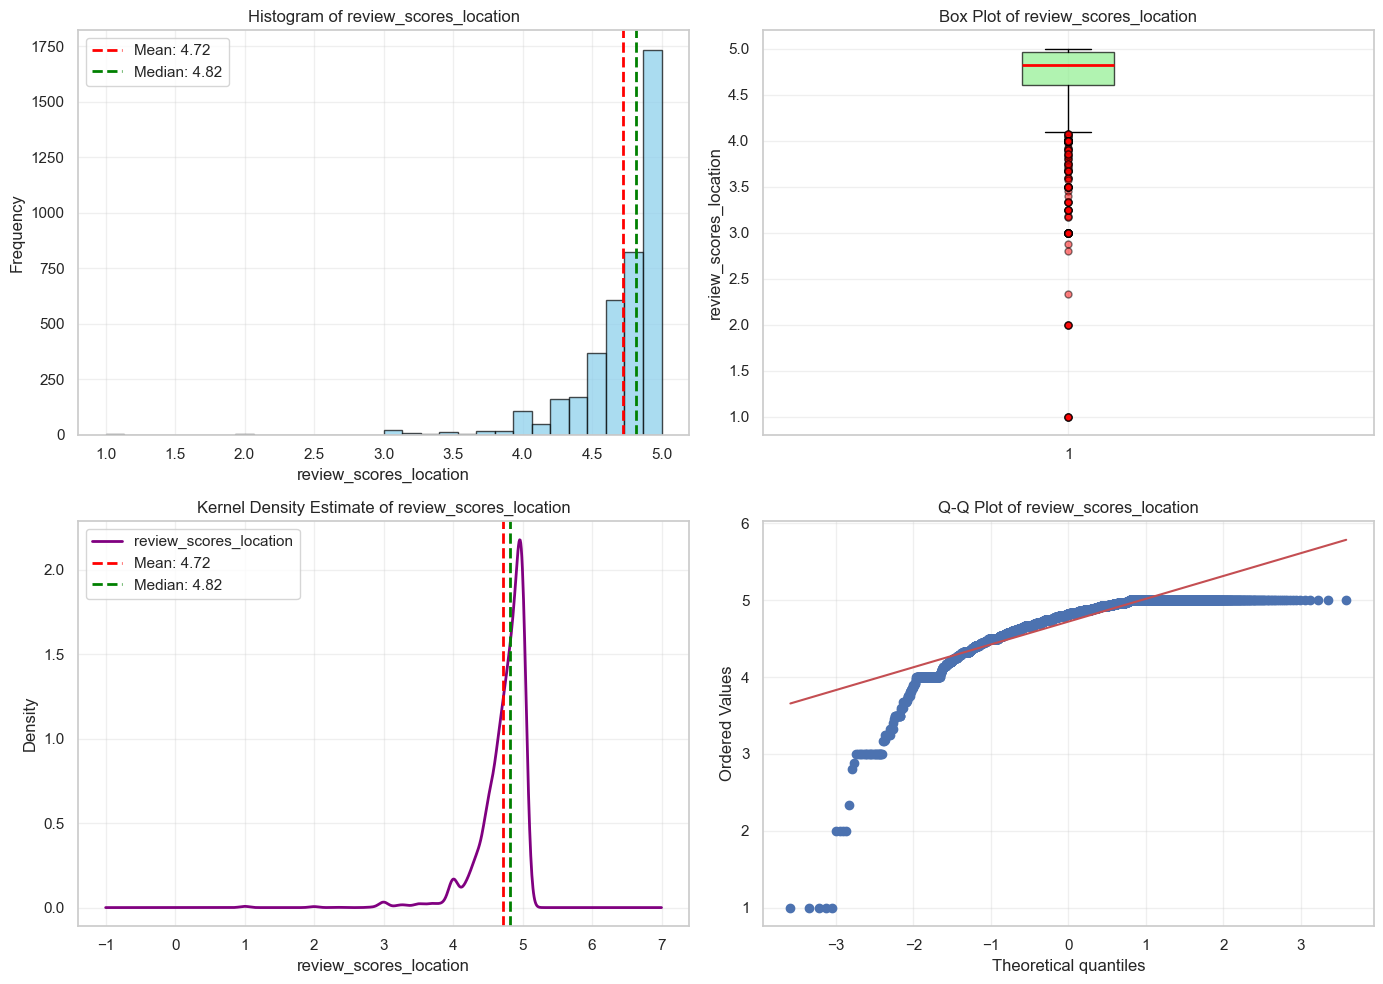

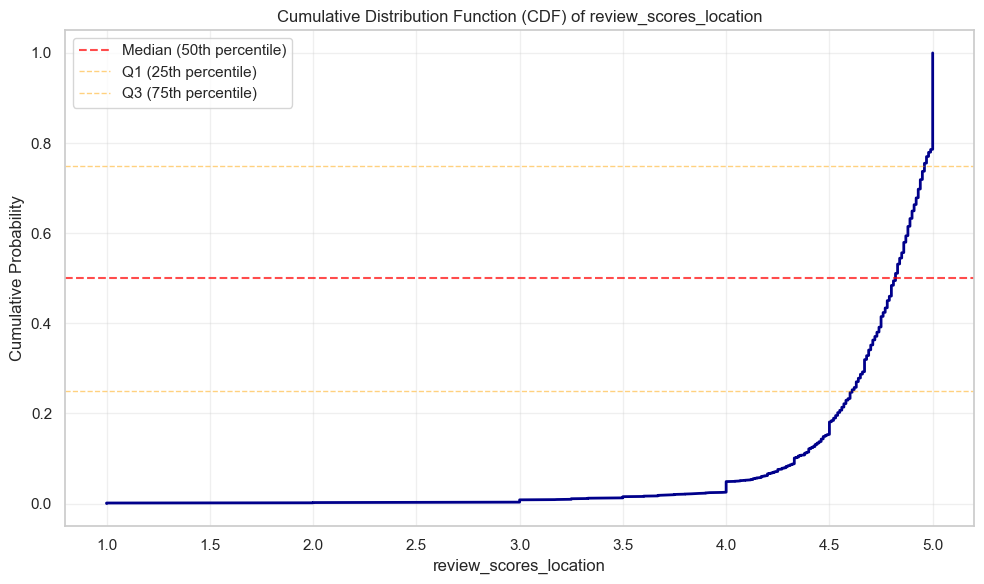

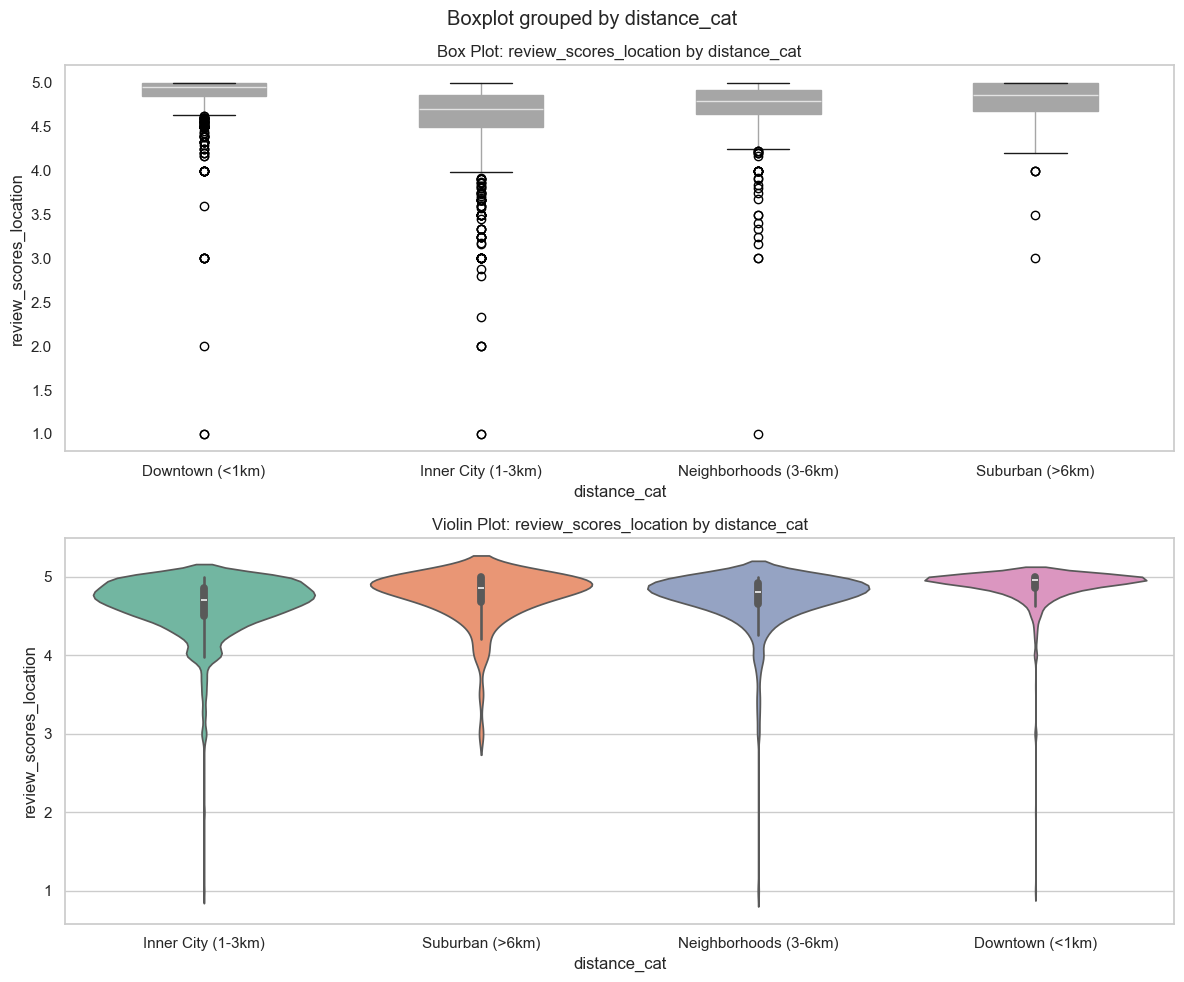

ONE-WAY ANOVA: review_scores_location by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2189
    Mean:   4.6268
    Median: 4.7000
    Std:    0.3698
    Min:    1.0000
    Max:    5.0000

  distance_cat = Suburban (>6km):
    N:      91
    Mean:   4.7512
    Median: 4.8600
    Std:    0.3313
    Min:    3.0000
    Max:    5.0000

  distance_cat = Neighborhoods (3-6km):
    N:      487
    Mean:   4.7227
    Median: 4.8000
    Std:    0.3454
    Min:    1.0000
    Max:    5.0000

  distance_cat = Downtown (<1km):
    N:      1357
    Mean:   4.8745
    Median: 4.9500
    Std:    0.2646
    Min:    1.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      152.9909
  P-value:             0.000000
  Eta-squared (η²):    0.100
  Effect size:         Medium effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect o

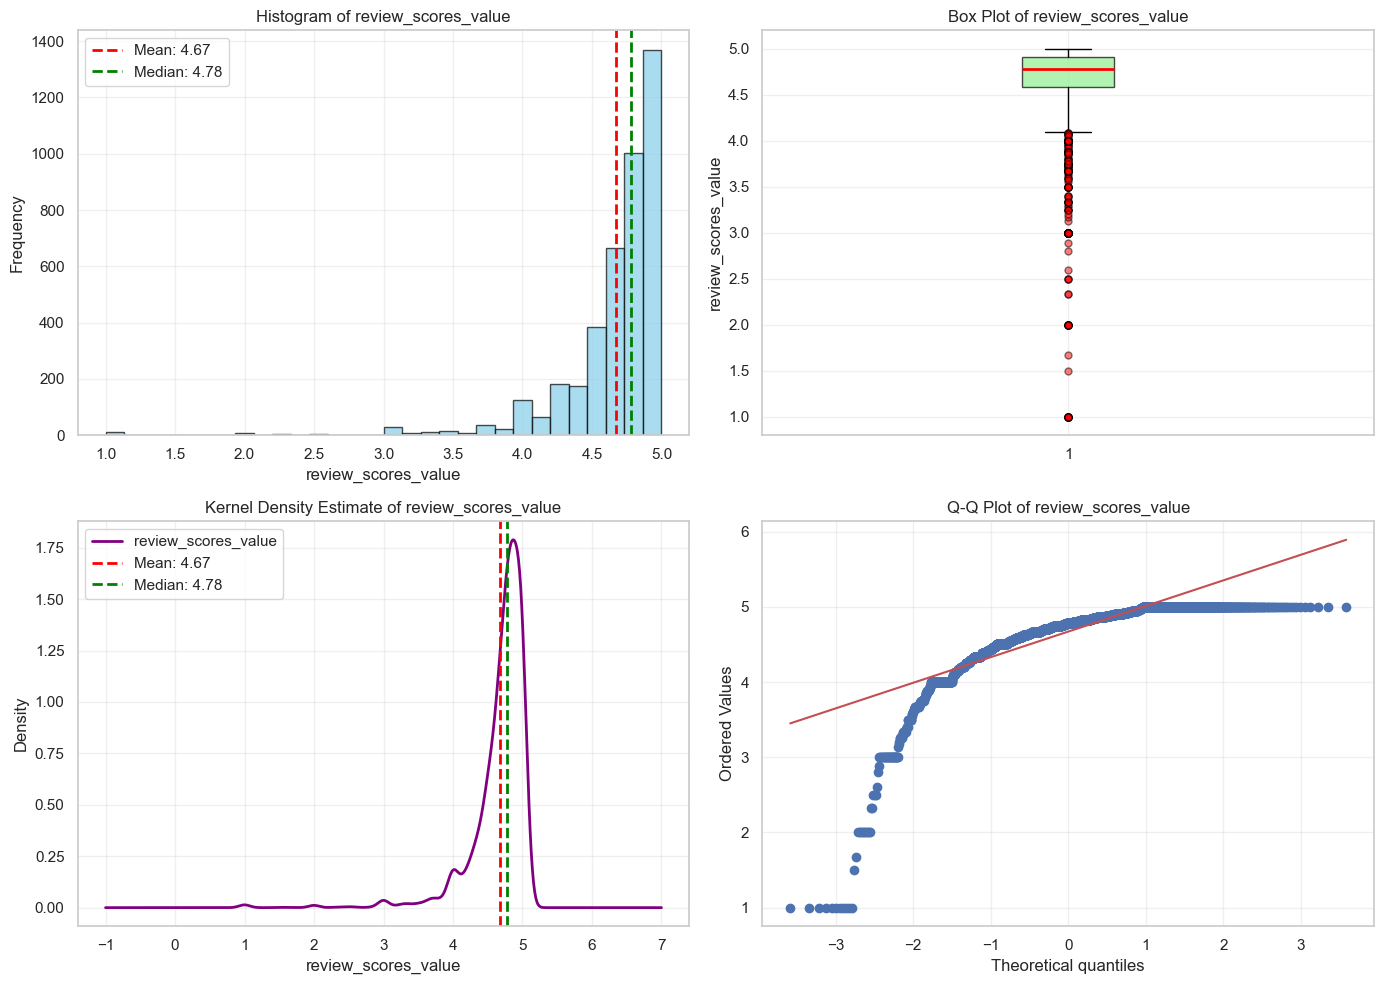

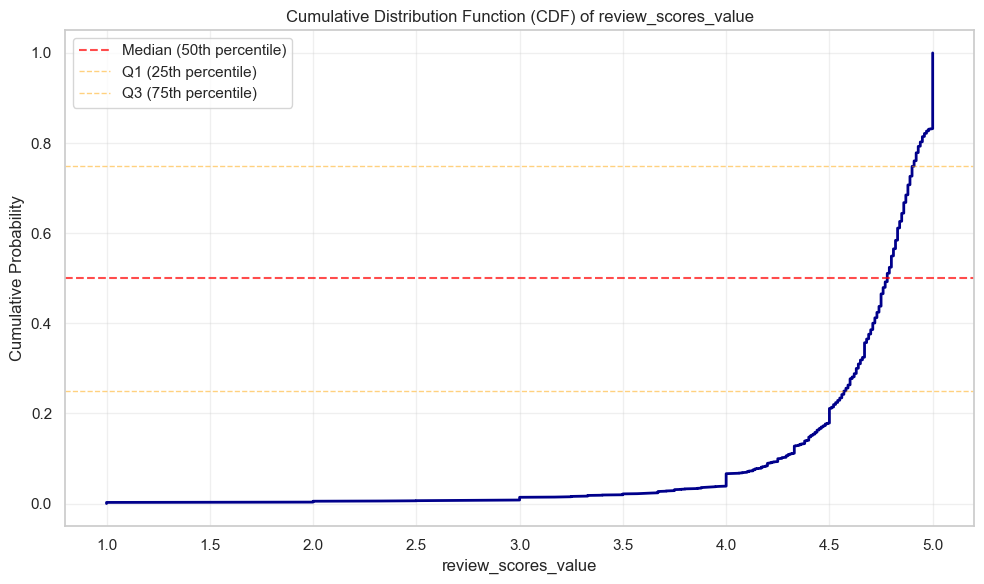

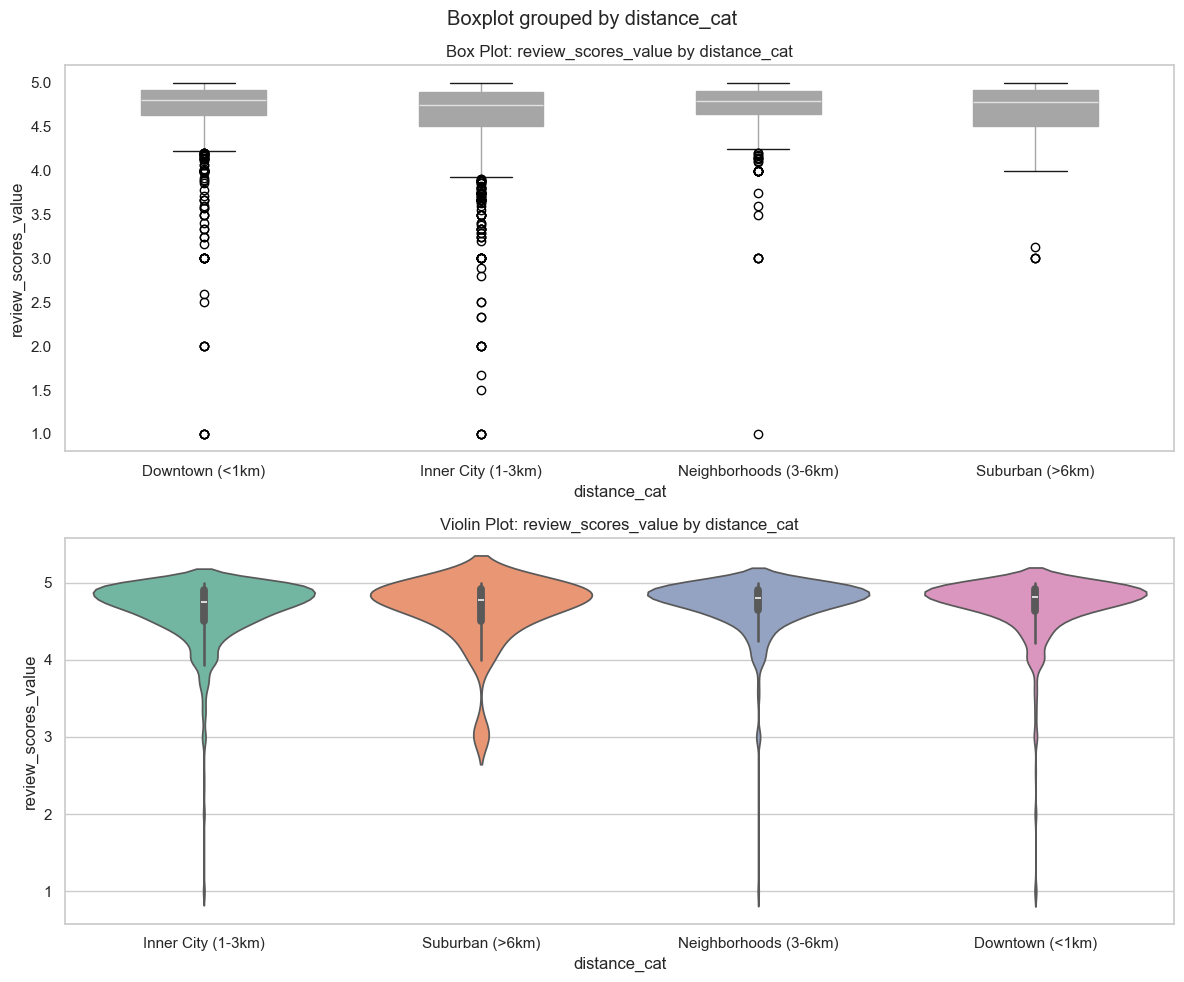

ONE-WAY ANOVA: review_scores_value by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2189
    Mean:   4.6421
    Median: 4.7500
    Std:    0.4264
    Min:    1.0000
    Max:    5.0000

  distance_cat = Suburban (>6km):
    N:      91
    Mean:   4.6489
    Median: 4.7800
    Std:    0.4366
    Min:    3.0000
    Max:    5.0000

  distance_cat = Neighborhoods (3-6km):
    N:      487
    Mean:   4.7253
    Median: 4.8000
    Std:    0.3355
    Min:    1.0000
    Max:    5.0000

  distance_cat = Downtown (<1km):
    N:      1357
    Mean:   4.6984
    Median: 4.8100
    Std:    0.4193
    Min:    1.0000
    Max:    5.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      8.3865
  P-value:             0.000015
  Eta-squared (η²):    0.006
  Effect size:         Negligible effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000015). distance_cat has a significant effect on

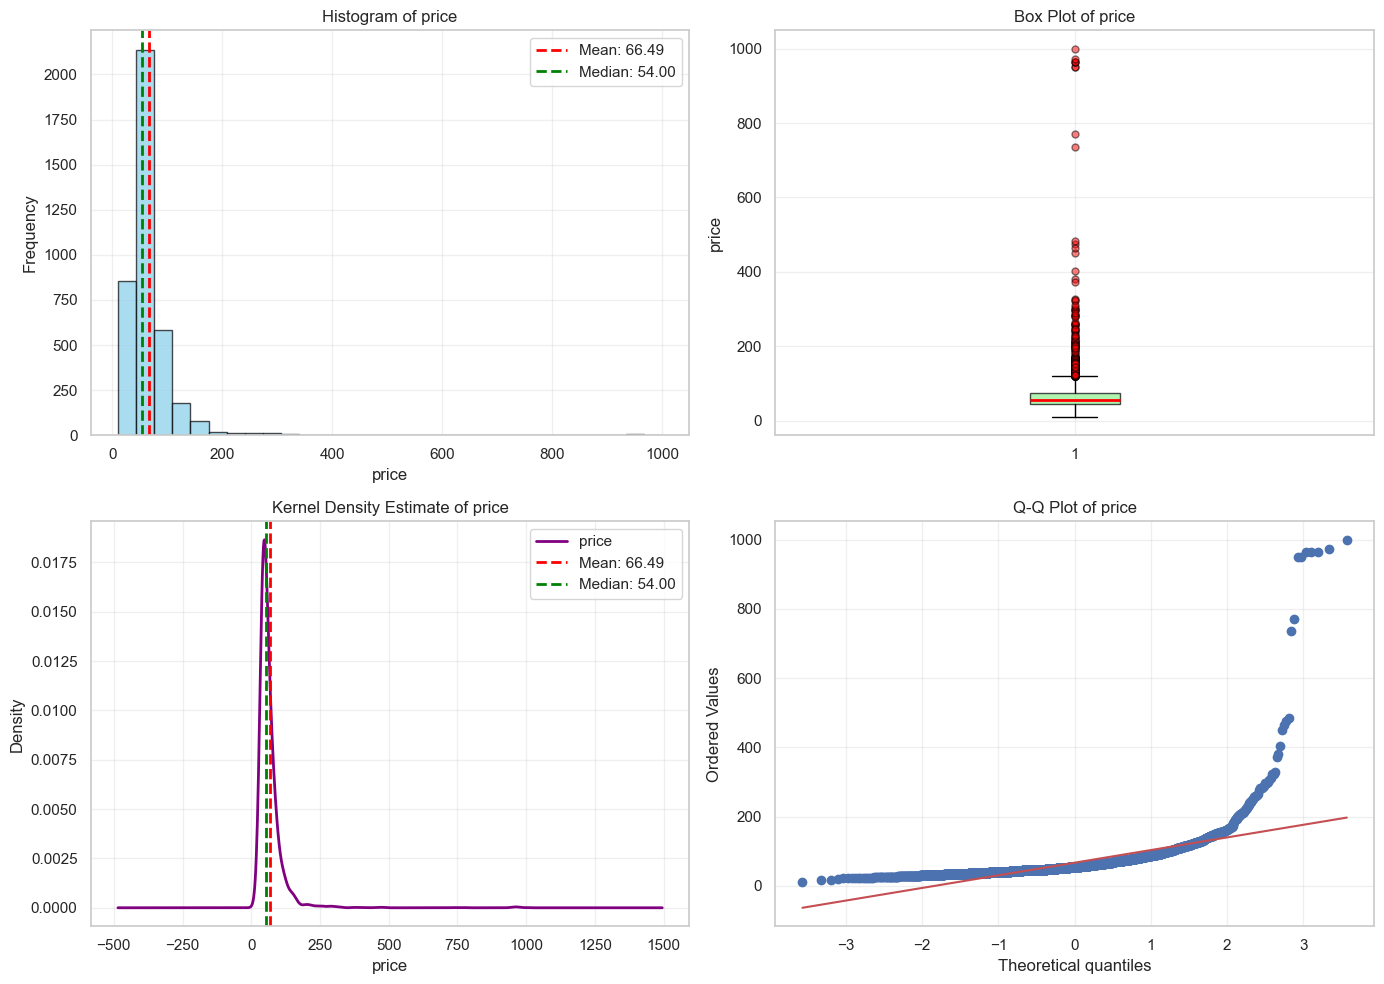

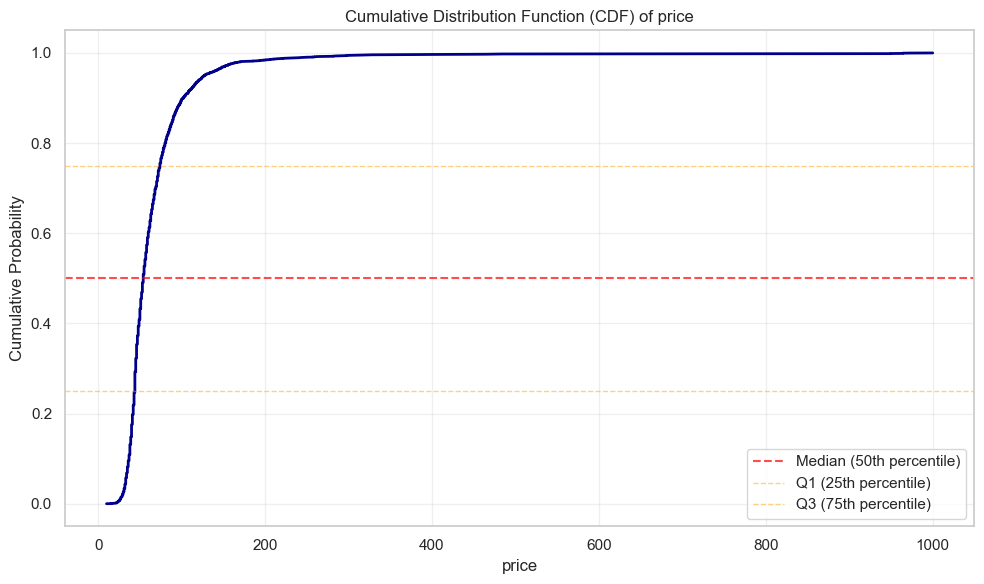

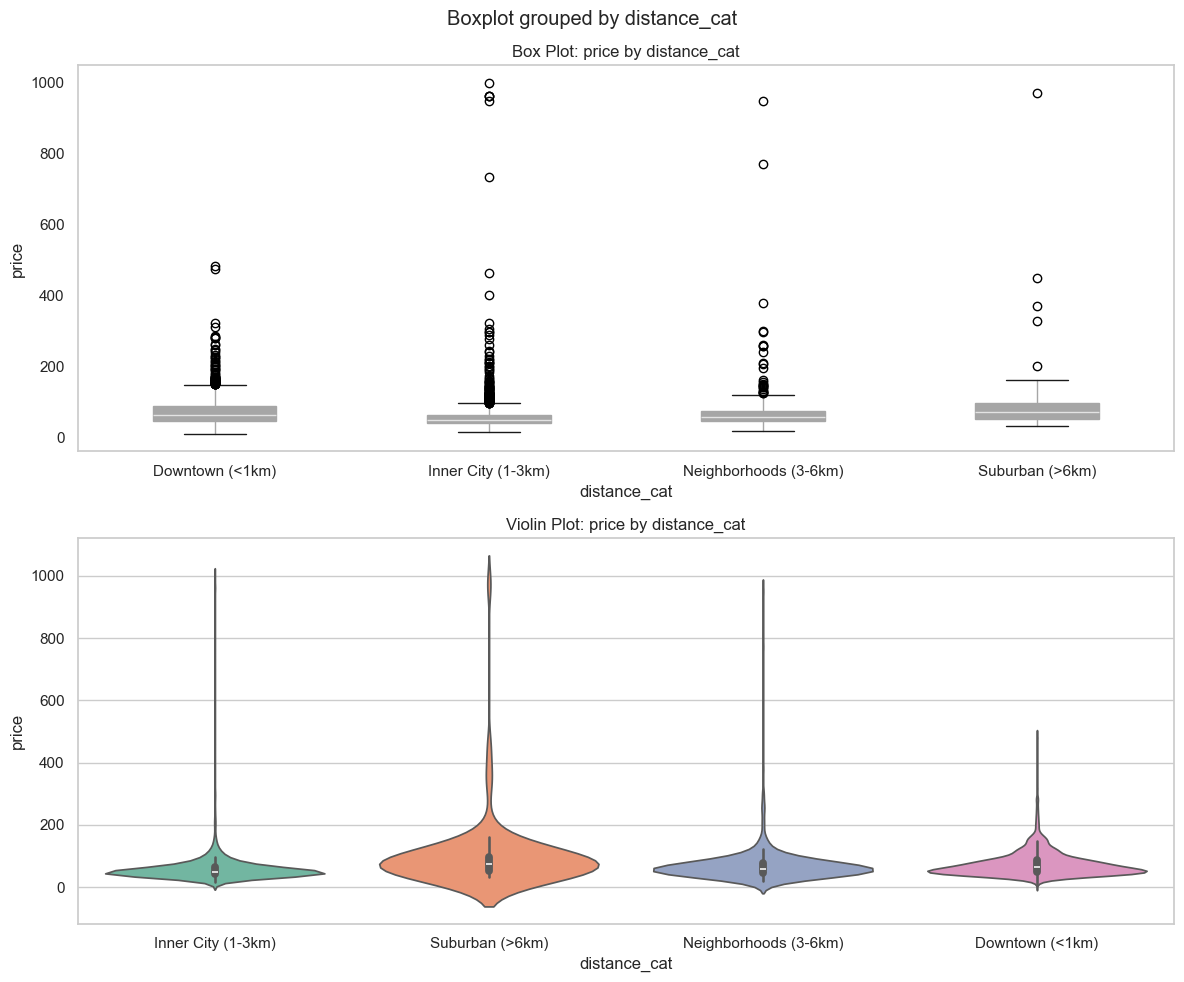

ONE-WAY ANOVA: price by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2108
    Mean:   59.5802
    Median: 49.0000
    Std:    55.8550
    Min:    16.0000
    Max:    1000.0000

  distance_cat = Suburban (>6km):
    N:      89
    Mean:   97.0674
    Median: 73.0000
    Std:    114.3734
    Min:    31.0000
    Max:    972.0000

  distance_cat = Neighborhoods (3-6km):
    N:      462
    Mean:   70.4394
    Median: 59.0000
    Std:    64.9940
    Min:    18.0000
    Max:    950.0000

  distance_cat = Downtown (<1km):
    N:      1248
    Mean:   74.5184
    Median: 63.0000
    Std:    42.0078
    Min:    10.0000
    Max:    484.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      29.7523
  P-value:             0.000000
  Eta-squared (η²):    0.022
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant e

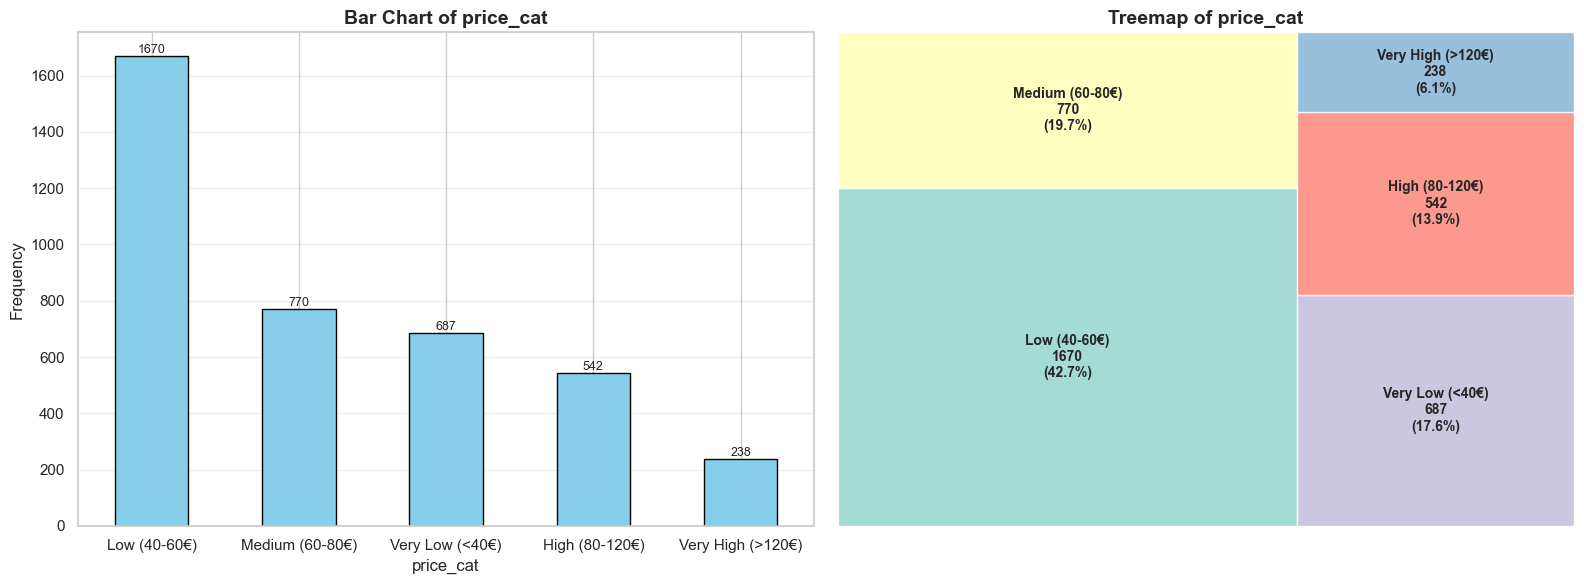

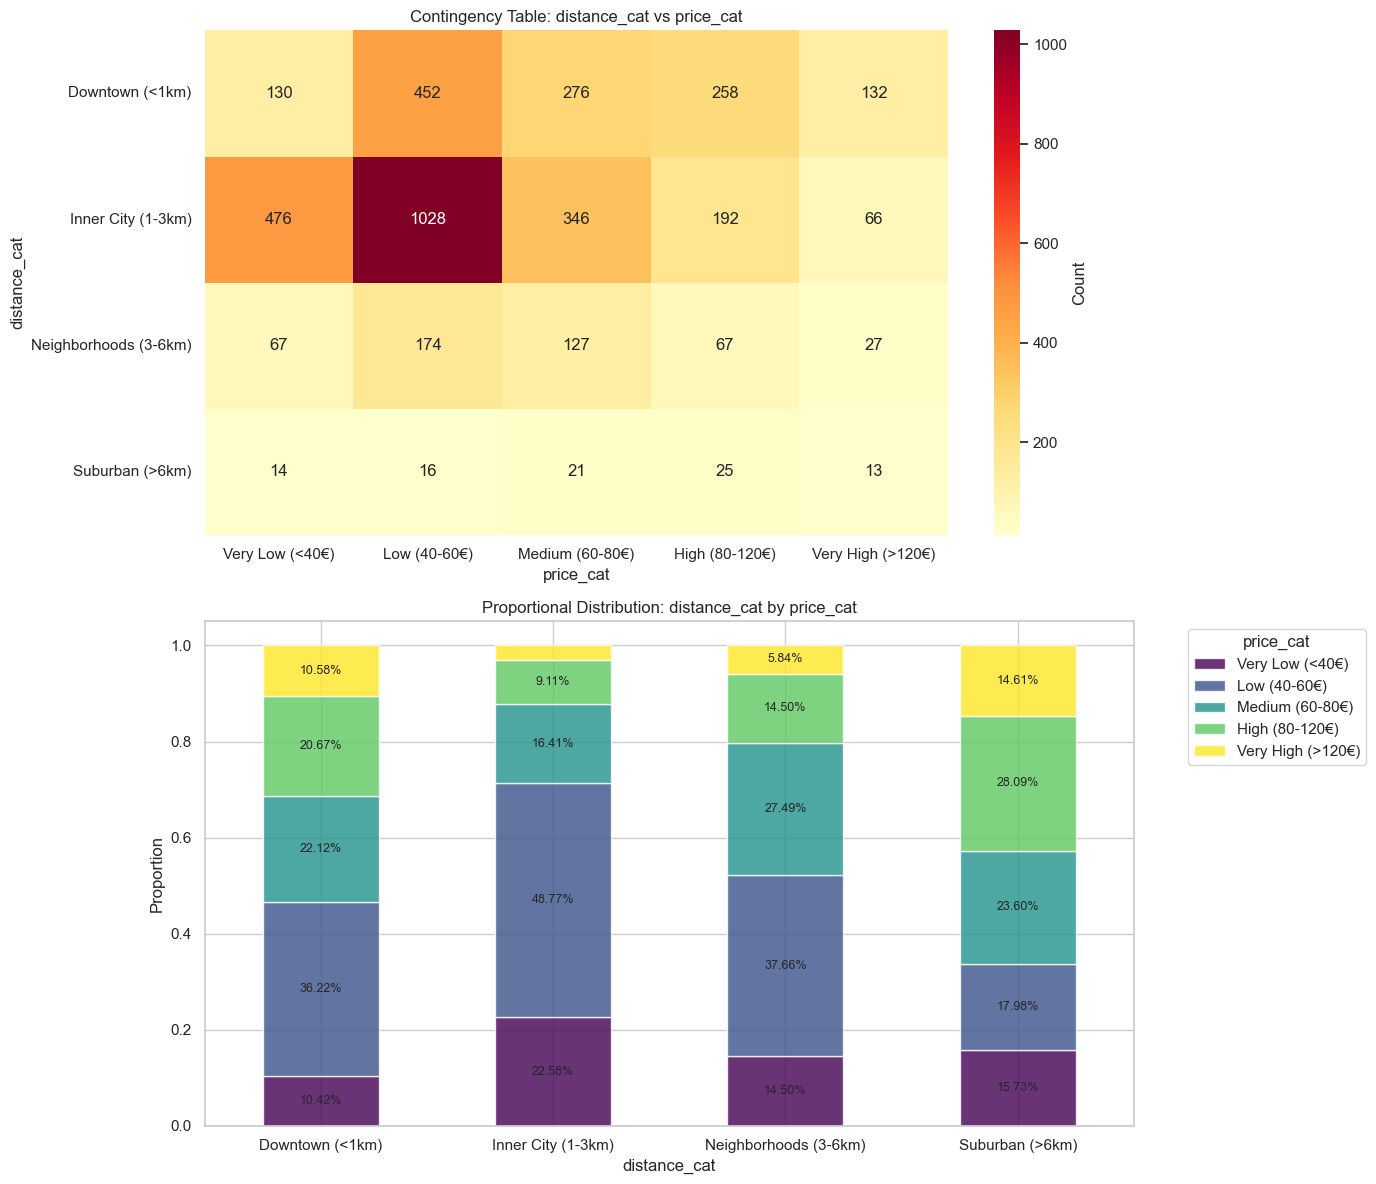

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs price_cat

Contingency Table:
price_cat              Very Low (<40€)  Low (40-60€)  Medium (60-80€)  \
distance_cat                                                            
Downtown (<1km)                    130           452              276   
Inner City (1-3km)                 476          1028              346   
Neighborhoods (3-6km)               67           174              127   
Suburban (>6km)                     14            16               21   

price_cat              High (80-120€)  Very High (>120€)  
distance_cat                                              
Downtown (<1km)                   258                132  
Inner City (1-3km)                192                 66  
Neighborhoods (3-6km)              67                 27  
Suburban (>6km)                    25                 13  

Test Statistics:
  Chi-square statistic: 316.4865
  Degrees of freedom:   12
  P-value:              0.000000
  Cramér's V:    

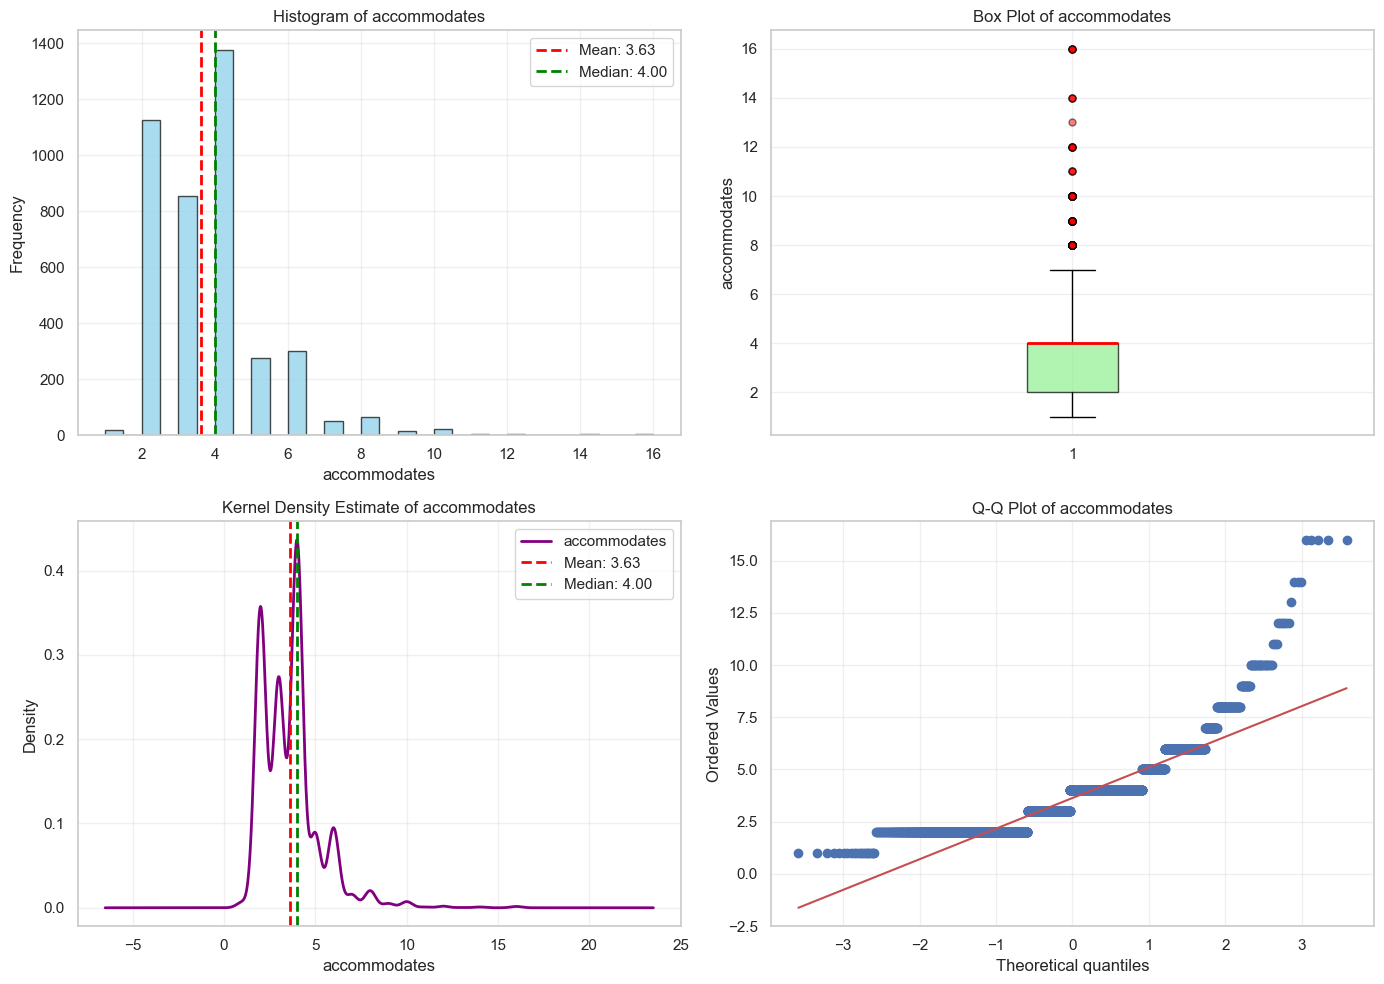

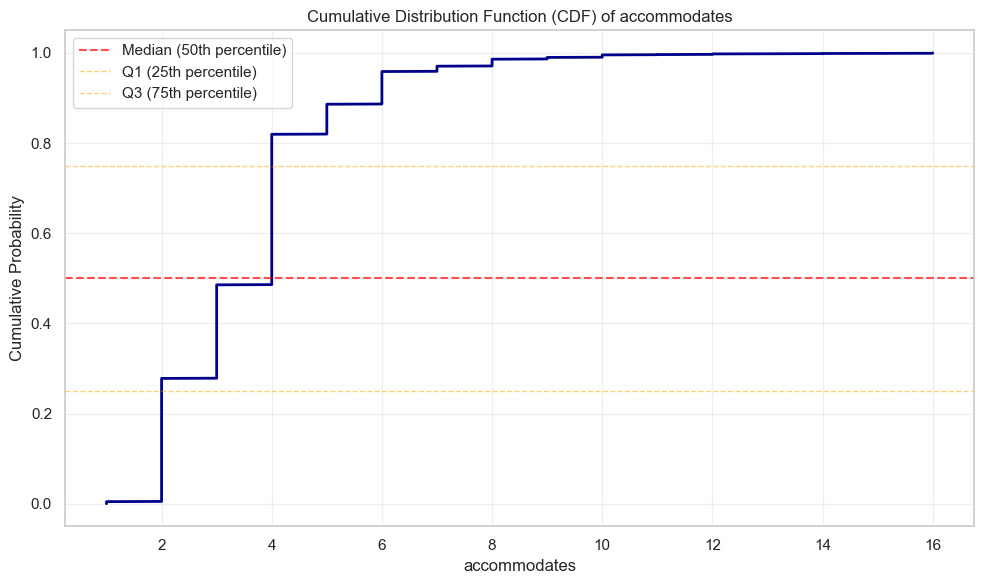

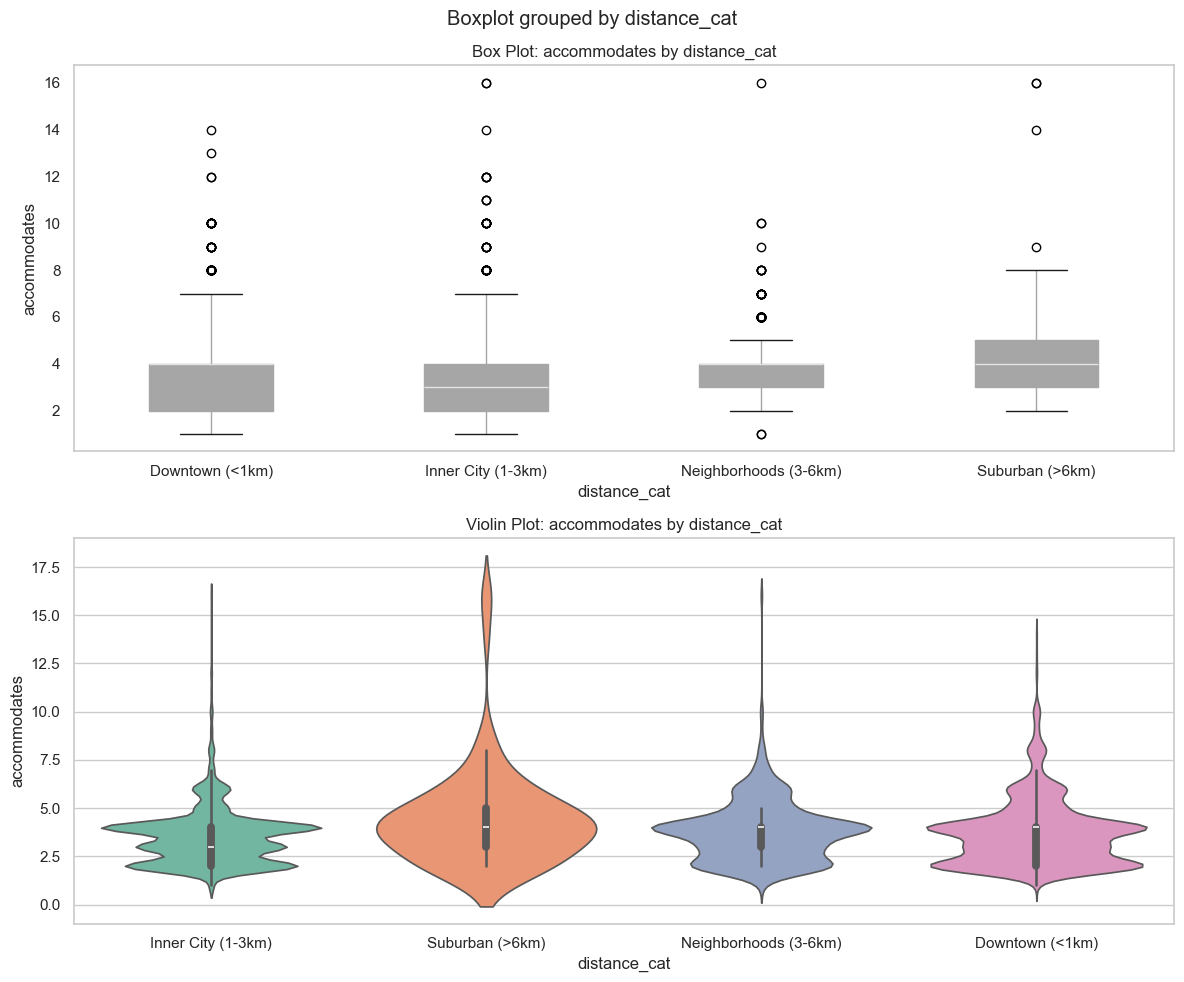

ONE-WAY ANOVA: accommodates by distance_cat

Descriptive Statistics by Group:

  distance_cat = Inner City (1-3km):
    N:      2189
    Mean:   3.5162
    Median: 3.0000
    Std:    1.4941
    Min:    1.0000
    Max:    16.0000

  distance_cat = Suburban (>6km):
    N:      91
    Mean:   4.4396
    Median: 4.0000
    Std:    2.5872
    Min:    2.0000
    Max:    16.0000

  distance_cat = Neighborhoods (3-6km):
    N:      487
    Mean:   3.8029
    Median: 4.0000
    Std:    1.5629
    Min:    1.0000
    Max:    16.0000

  distance_cat = Downtown (<1km):
    N:      1357
    Mean:   3.7104
    Median: 4.0000
    Std:    1.7182
    Min:    1.0000
    Max:    14.0000

Test Statistics:
  Test:                One-Way ANOVA
  Test statistic:      14.3061
  P-value:             0.000000
  Eta-squared (η²):    0.010
  Effect size:         Small effect
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT difference detected (p=0.000000). distance_cat has a significant effect on accomm

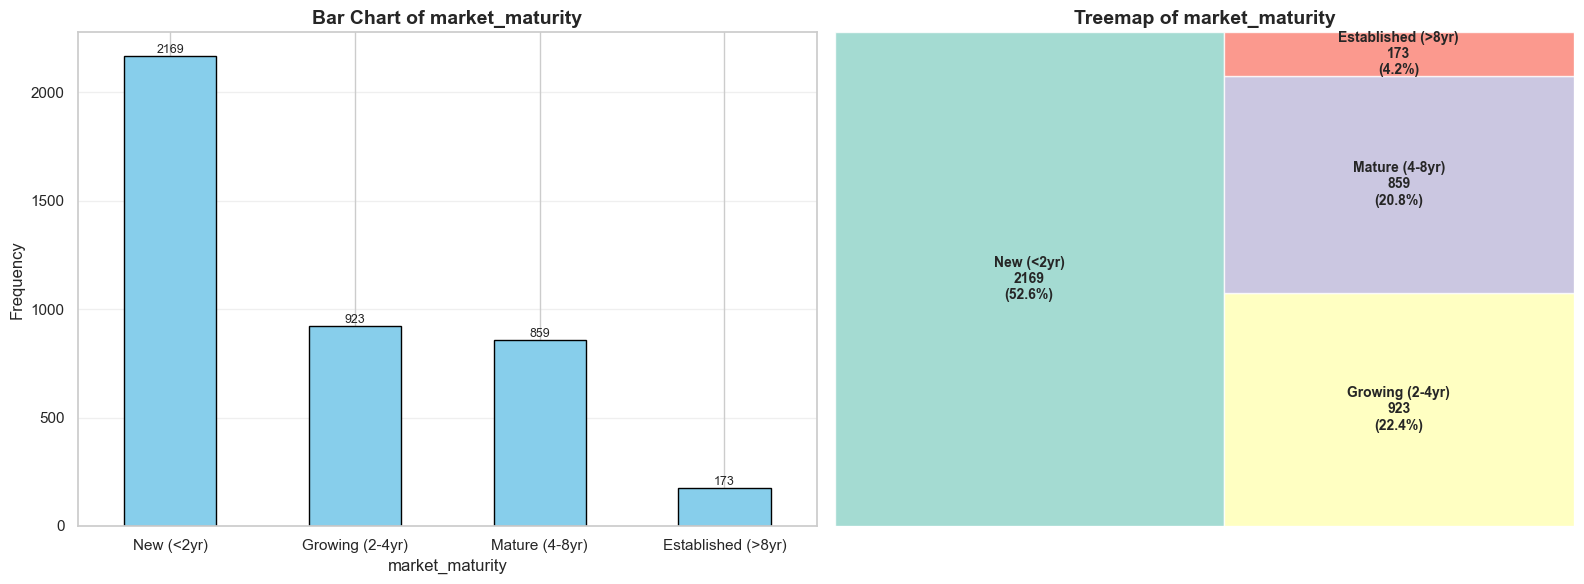

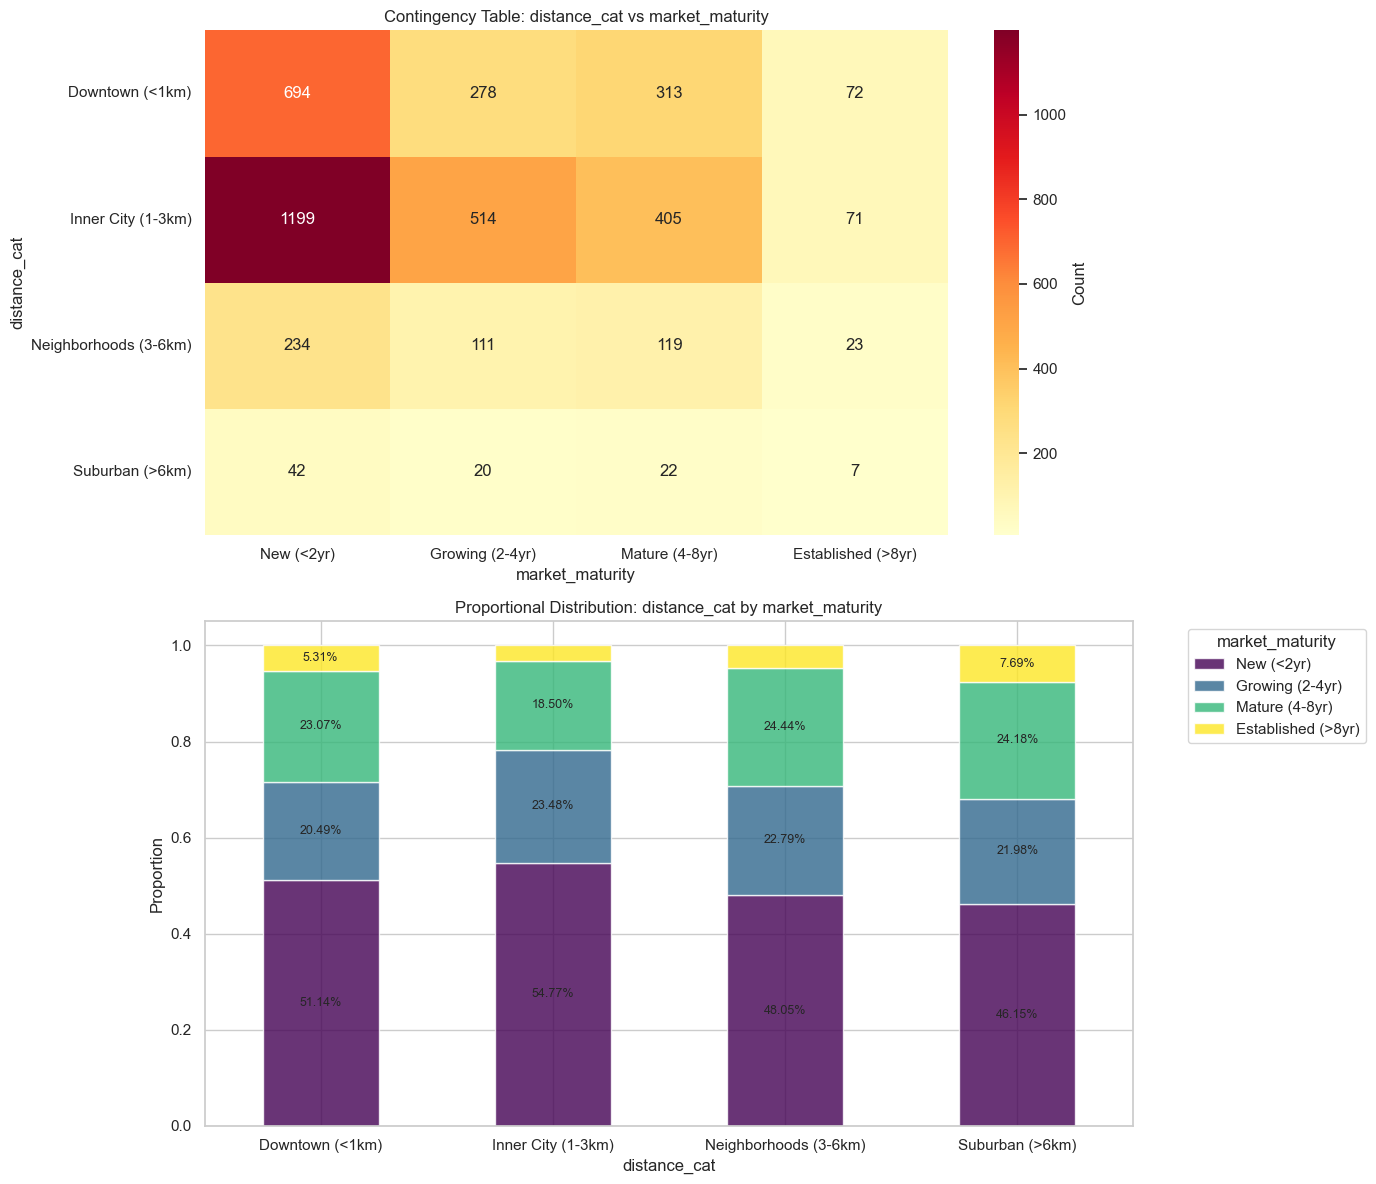

CHI-SQUARE TEST OF INDEPENDENCE: distance_cat vs market_maturity

Contingency Table:
market_maturity        New (<2yr)  Growing (2-4yr)  Mature (4-8yr)  \
distance_cat                                                         
Downtown (<1km)               694              278             313   
Inner City (1-3km)           1199              514             405   
Neighborhoods (3-6km)         234              111             119   
Suburban (>6km)                42               20              22   

market_maturity        Established (>8yr)  
distance_cat                               
Downtown (<1km)                        72  
Inner City (1-3km)                     71  
Neighborhoods (3-6km)                  23  
Suburban (>6km)                         7  

Test Statistics:
  Chi-square statistic: 32.7294
  Degrees of freedom:   9
  P-value:              0.000149
  Cramér's V:           0.051
  Effect size:          Negligible association
  Significant at α=0.05: YES

Interpretation

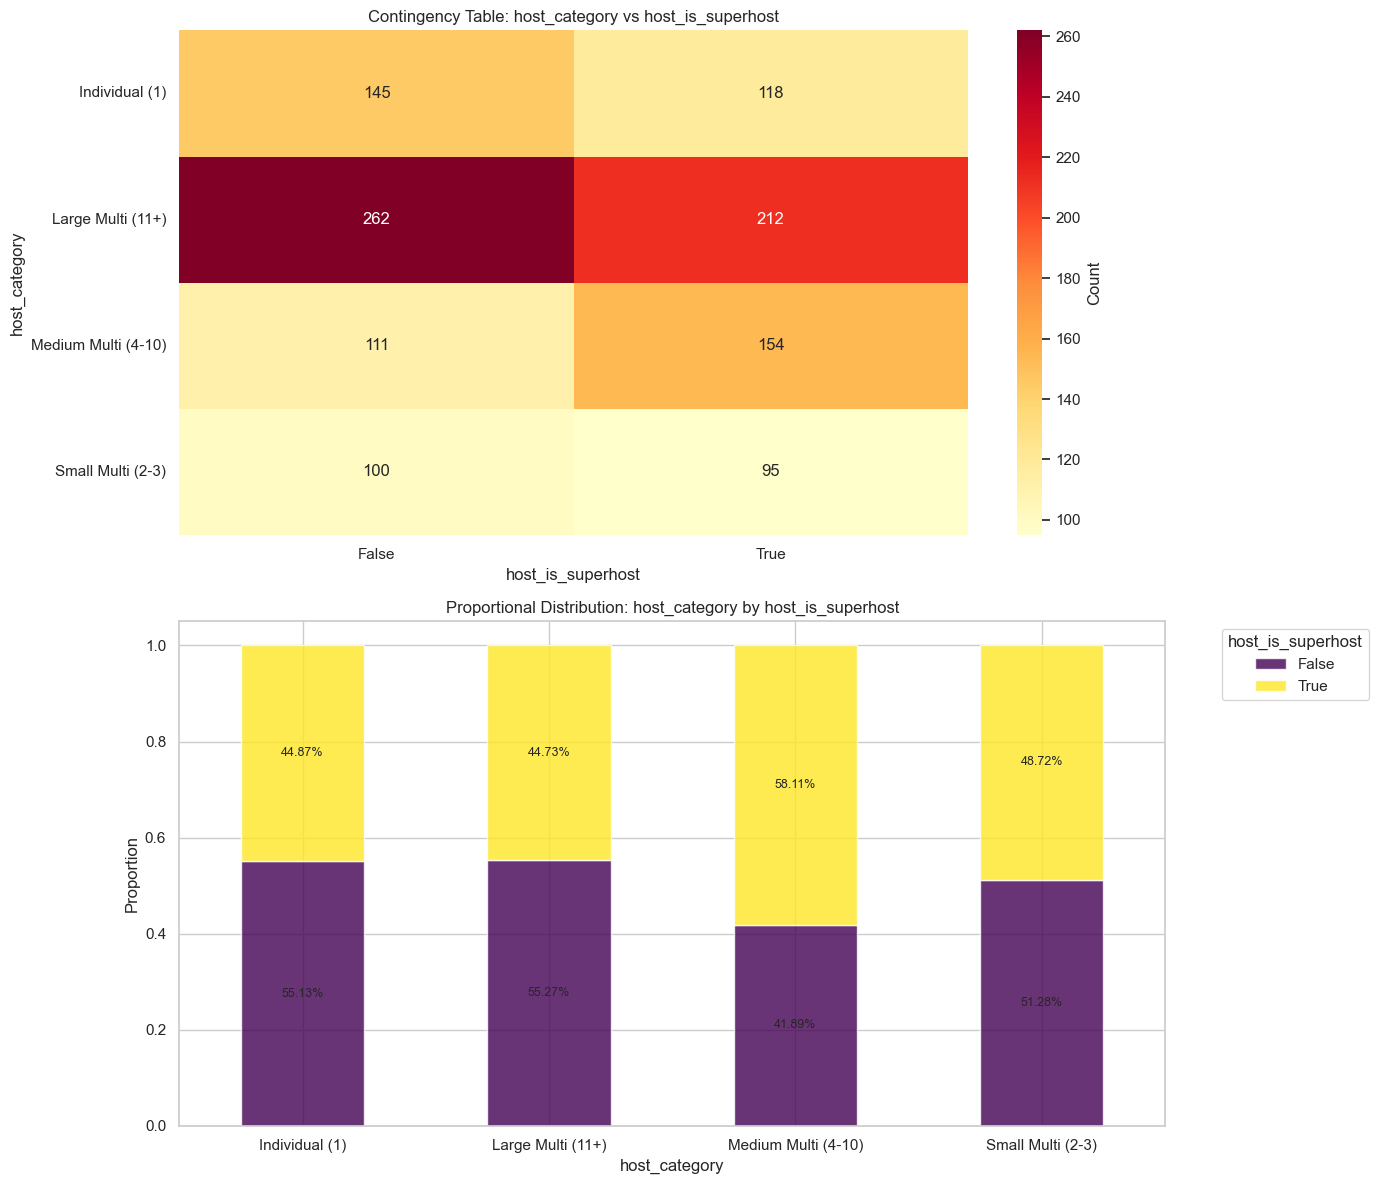

CHI-SQUARE TEST OF INDEPENDENCE: host_category vs host_is_superhost

Contingency Table:
host_is_superhost    False  True 
host_category                    
Individual (1)         145    118
Large Multi (11+)      262    212
Medium Multi (4-10)    111    154
Small Multi (2-3)      100     95

Test Statistics:
  Chi-square statistic: 13.8958
  Degrees of freedom:   3
  P-value:              0.003051
  Cramér's V:           0.108
  Effect size:          Weak association
  Significant at α=0.05: YES

Interpretation:
  SIGNIFICANT association detected (p=0.003051). host_category and host_is_superhost are related. Weak association (Cramér's V = 0.108).


In [49]:
for var in variables:
    
    if pd.api.types.is_numeric_dtype(df[var]):
        
        analyze_numeric_variable(df[var])
        analyze_categorical_numerical(df["distance_cat"], df[var])

    else:
        
        analyze_categorical_variable(df[var])
        analyze_categorical_categorical(df["distance_cat"], df[var])

    print("\n", "\n")

analyze_categorical_categorical(downtown_df["host_category"], downtown_df["host_is_superhost"])